<a href="https://colab.research.google.com/github/evelynmmartinez/Prediction-of-Product-Sales/blob/main/StudentsSuccessPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Students' Dropout and Academic Success

## Imports

In [ ]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Source of data:
1. UC Irvine Machine Learning Repository
  Cite:  
  Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

2. The data shows students in higher edcuation and the predition if they will succeed in their academics

3. Target is target whether they will dropout, enrolled, graduate.

4. A row represents a student.

5. This is a classification problem.

6. 37 features

7. 4424 rows

8. The issue I see here might be the amount of columns, a determination of what is needed and isn't might be an issue.

In [ ]:
#Load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTSBvadXUJKErjo0-QaBc_YhkX122VMi6Zjzj_N02iHCO6rsGAaeGNzAqAeCHLRT1poTxuhhY_E3lKw/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Data  Exploration and Cleaning

In [ ]:
df.isna().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

-No missing value

In [ ]:
#Renaming the column from "Nacionality" to "Nationalty"
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [ ]:
#Removing the "\t" from Daytime/evening attendance column name

df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

In [ ]:
#Change column from numeric to categorical
df['Course'] = df['Course'].astype('object')
df['Gender'] = df['Gender'].astype('object')
df['Marital status'] = df['Marital status'].astype('object')
df['Daytime/evening attendance'] = df['Daytime/evening attendance'].astype('object')
df['Nationality'] = df['Nationality'].astype('object')
df['Displaced'] = df['Gender'].astype('object')
df['Educational special needs'] = df['Educational special needs'].astype('object')
df['Debtor'] = df['Debtor'].astype('object')
df['Tuition fees up to date'] = df['Tuition fees up to date'].astype('object')
df['Scholarship holder'] = df['Scholarship holder'].astype('object')
df['International'] = df['International'].astype('object')
df['Application order'] = df['Application order'].astype('object')
df['Application mode'] = df['Application mode'].astype('object')


In [ ]:
df.select_dtypes('object').nunique()


Marital status                 6
Application mode              18
Application order              8
Course                        17
Daytime/evening attendance     2
Nationality                   21
Displaced                      2
Educational special needs      2
Debtor                         2
Tuition fees up to date        2
Gender                         2
Scholarship holder             2
International                  2
Target                         3
dtype: int64

In [ ]:
df.select_dtypes('number').nunique()


Previous qualification                             17
Previous qualification (grade)                    101
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Age at enrollment                                  46
Curricular units 1st sem (credited)                21
Curricular units 1st sem (enrolled)                23
Curricular units 1st sem (evaluations)             35
Curricular units 1st sem (approved)                23
Curricular units 1st sem (grade)                  797
Curricular units 1st sem (without evaluations)     11
Curricular units 2nd sem (credited)                19
Curricular units 2nd sem (enrolled)                22
Curricular units 2nd sem (evaluations)             30
Curricular units 2nd sem (approved)                20
Curricular units 2nd sem (gr

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Previous qualification', 'Previous qualification (grade)',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Nationality', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International', 'Target'],
      dtype='object')

In [ ]:
#Checking for inconsistencies
for col in cat_cols:
  print(f"Value Counts for: {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for: Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64


Value Counts for: Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64


Value Counts for: Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64


Value Counts for: Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64


Value Counts for: Daytime/evening attendance
1    3941
0     483
Name: Daytime/evening attendance, dtype: int64


Value Counts for: Nationality
1      4314
41       38
26       14
22  

In [ ]:
for num in num_cols:
  print(f"Statistical measures: {num}")
  print(df[num].describe())
  print('\n')

Statistical measures: Previous qualification
count    4424.000000
mean        4.577758
std        10.216592
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        43.000000
Name: Previous qualification, dtype: float64


Statistical measures: Previous qualification (grade)
count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: Previous qualification (grade), dtype: float64


Statistical measures: Mother's qualification
count    4424.000000
mean       19.561935
std        15.603186
min         1.000000
25%         2.000000
50%        19.000000
75%        37.000000
max        44.000000
Name: Mother's qualification, dtype: float64


Statistical measures: Father's qualification
count    4424.000000
mean       22.275316
std        15.343108
min         1.000000
25%         3.000000
50%        19.000000
75%        37.000000
max        4

# EDA

#### **Custom Functions**

###### **Explore Univariate Categorical Function**

- These functions were sourced from the learning platform: CodingDojo.

In [ ]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"{x}", fontweight='bold')

  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### **Explore Univariate Numerical Function**

In [ ]:
def explore_numeric(df, x, figsize=(6,5) ):


  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  sns.histplot(data=df, x=x, ax=axes[0])

  sns.boxplot(data=df, x=x, ax=axes[1])

  axes[0].set_title(f"{x}", fontweight='bold')

  fig.tight_layout()

  plt.show()


  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


## Target Univariate Visualization

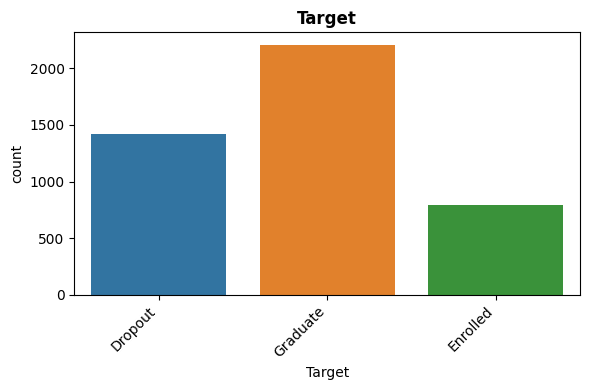

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Graduate' occurs 2209 times (49.93%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Target'
explore_categorical(df, feature);

- It is observed that the count for 'Graduate' is the highest, occuring 2,209 times almost 50% of the counts are 'Graduates.' This is a positive count as the the study is to see how many students will either, dropout, enroll or graduate, being the successful outcome.

# Feature inspections:

Univariate and Multivariate inspections

### Marital status

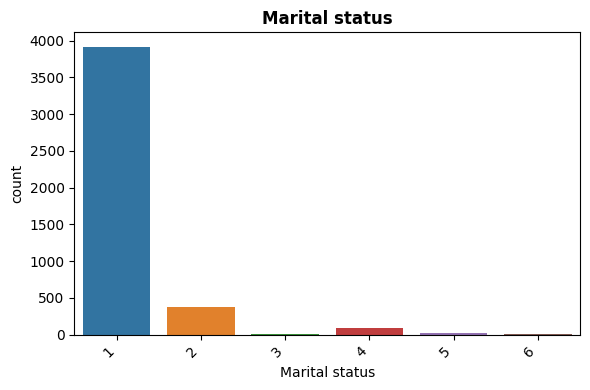

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '1' occurs 3919 times (88.58%)
- Not constant or quasi-constant.


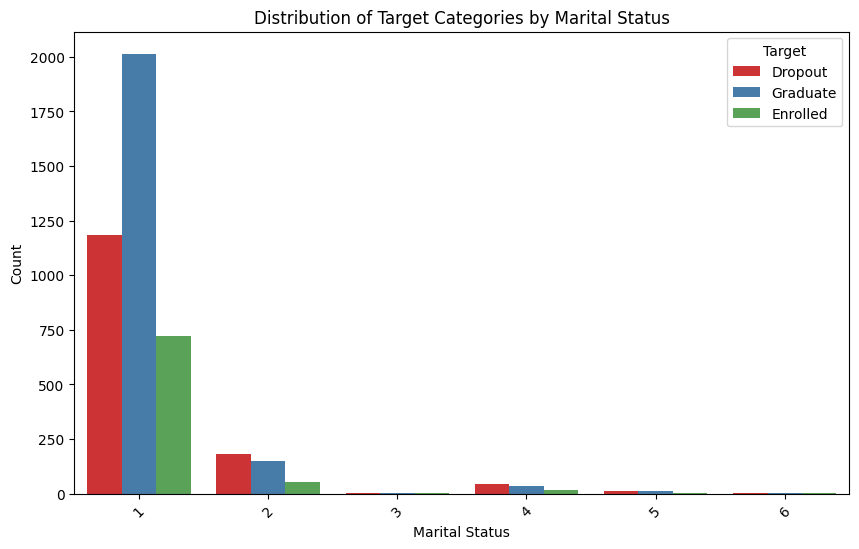

In [ ]:
feature = 'Marital status'
explore_categorical(df, feature);
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital status', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- Most students are single, 88.58% of the values were for single students. 6- legally seperated was the lowest. The second highest count is the (2) – married.


### Application mode

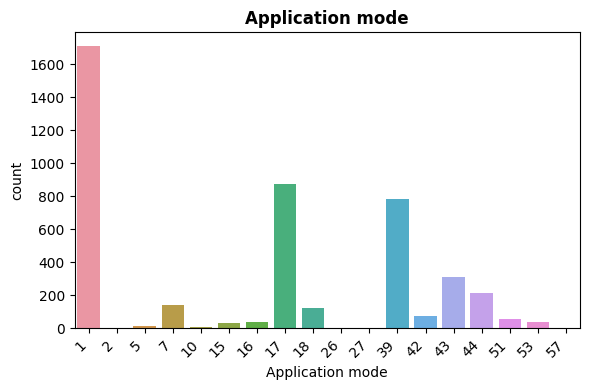

- NaN's Found: 0 (0.0%)
- Unique Values: 18
- Most common value: '1' occurs 1708 times (38.61%)
- Not constant or quasi-constant.


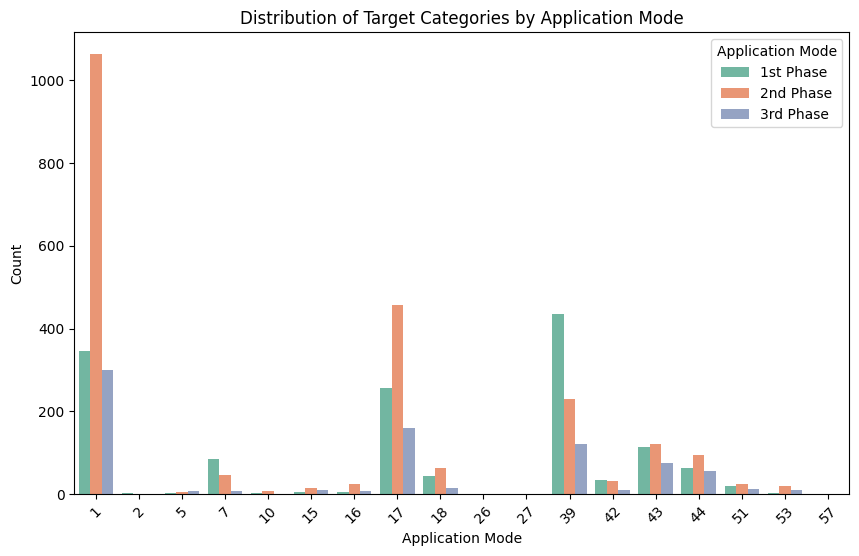

In [ ]:
feature = 'Application mode'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Application mode', hue='Target', palette='Set2')
plt.title('Distribution of Target Categories by Application Mode')
plt.xlabel('Application Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')

plt.legend(title='Target', labels=['Enroll', 'Graduate', 'Dropout'])
plt.legend(title='Application Mode', labels=['1st Phase', '2nd Phase', '3rd Phase', ...])  # Add labels for application modes
plt.show()

- The highest count of the application mode is 1st phase - general contingent.

### Application order

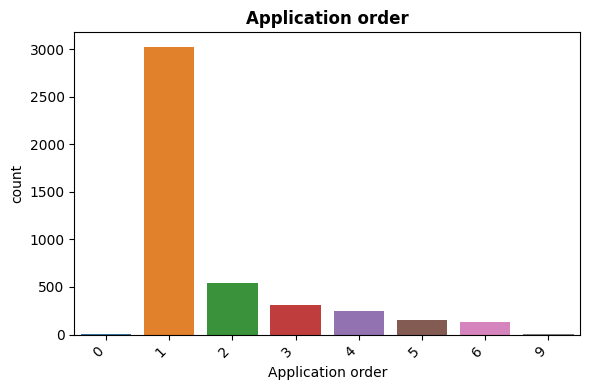

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '1' occurs 3026 times (68.4%)
- Not constant or quasi-constant.


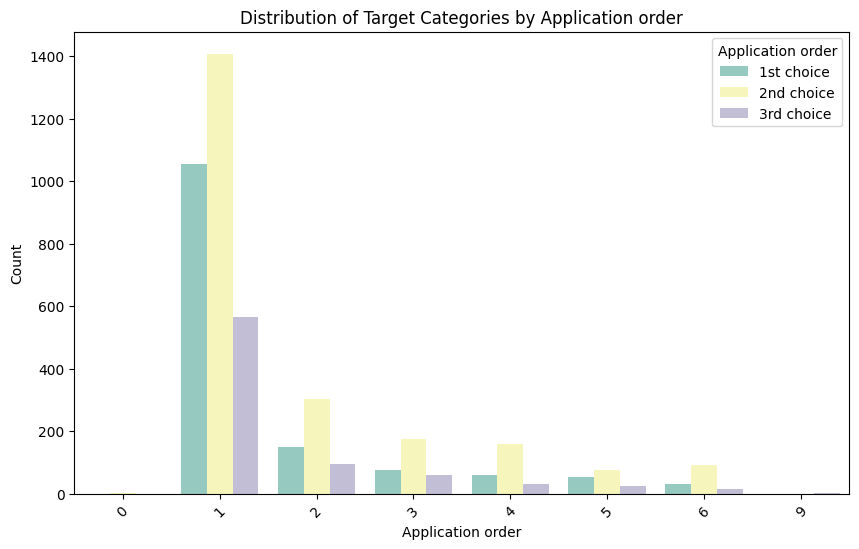

In [ ]:
feature = 'Application order'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Application order', hue='Target', palette='Set3')
plt.title('Distribution of Target Categories by Application order')
plt.xlabel('Application order')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')

plt.legend(title='Target', labels=['Enroll', 'Graduate', 'Dropout'])
plt.legend(title='Application order', labels=['1st choice', '2nd choice', '3rd choice', ...])
plt.show()

- The value with the highest count was on the application order was the first choice with almost 67%. Outliers here would be the 9th order of application order.

### Course

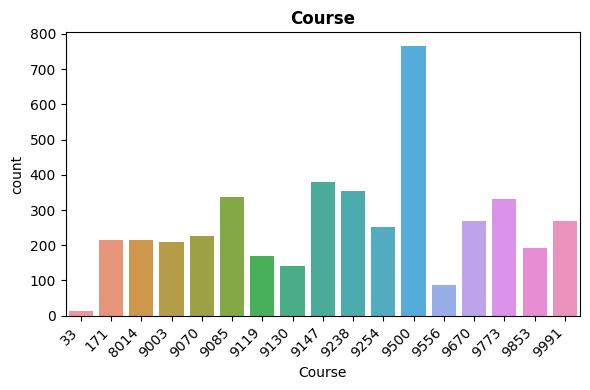

- NaN's Found: 0 (0.0%)
- Unique Values: 17
- Most common value: '9500' occurs 766 times (17.31%)
- Not constant or quasi-constant.


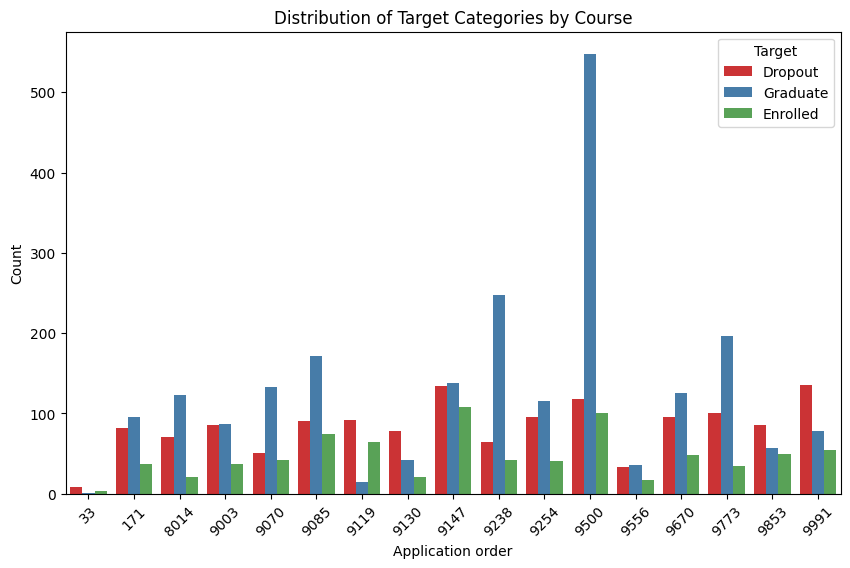

In [ ]:
feature = 'Course'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Course', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Course')
plt.xlabel('Application order')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- The highest count for Course is 9500 - Nursing

### Daytime/Evening Attendance

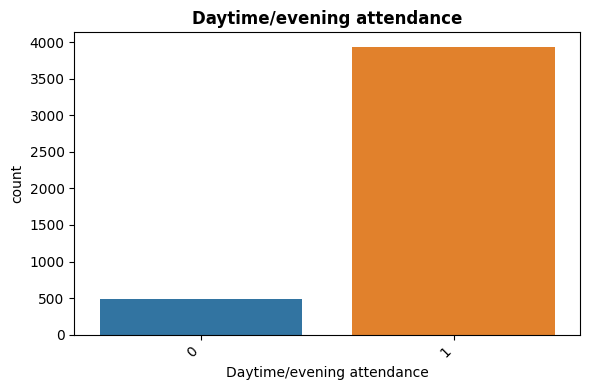

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1' occurs 3941 times (89.08%)
- Not constant or quasi-constant.


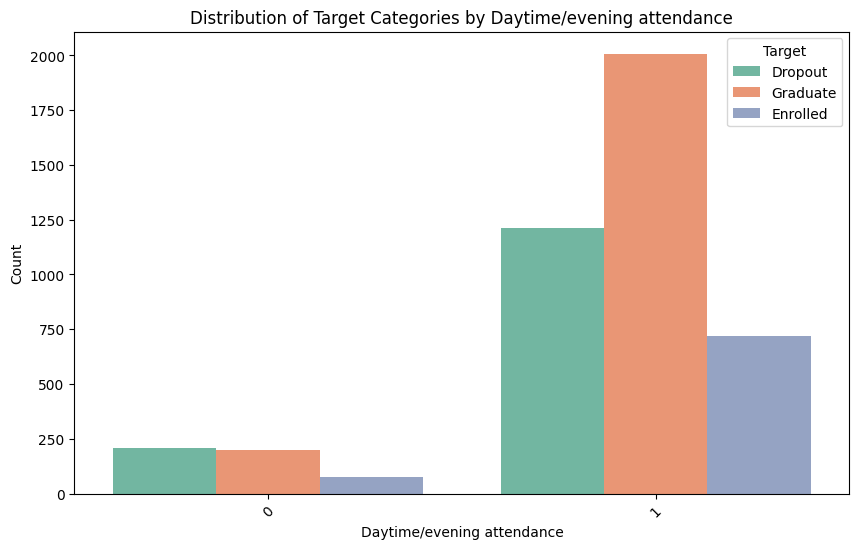

In [ ]:
feature = 'Daytime/evening attendance'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Daytime/evening attendance', hue='Target', palette='Set2')
plt.title('Distribution of Target Categories by Daytime/evening attendance')
plt.xlabel('Daytime/evening attendance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- Most students attend during daytime and as it demonstrates in the distribution it also has the highest rate of graduates during day time attendance.

### Previous Qualification

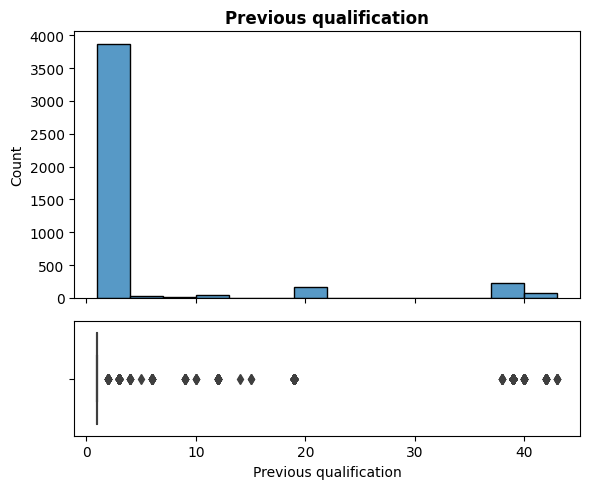

- NaN's Found: 0 (0.0%)
- Unique Values: 17
- Most common value: '1' occurs 3717 times (84.02%)
- Not constant or quasi-constant.


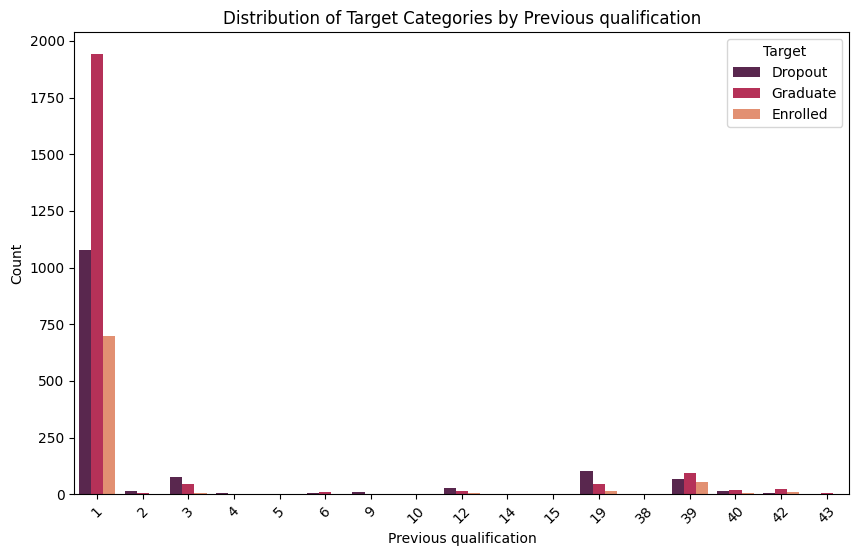

In [ ]:
feature = 'Previous qualification'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Previous qualification', hue='Target', palette='rocket')
plt.title('Distribution of Target Categories by Previous qualification')
plt.xlabel('Previous qualification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Previous Qualification (Grade)

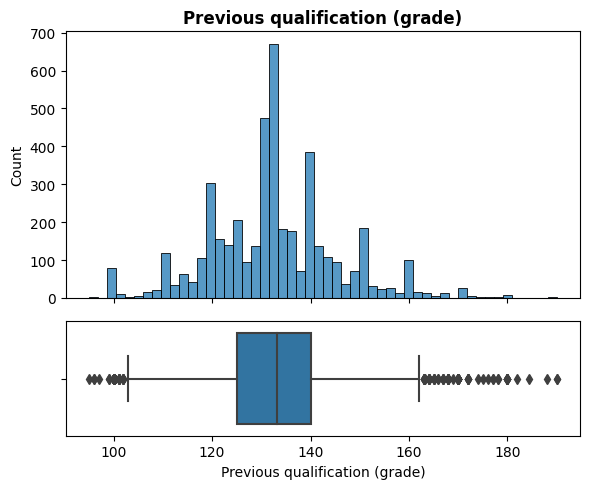

- NaN's Found: 0 (0.0%)
- Unique Values: 101
- Most common value: '133.1' occurs 491 times (11.1%)
- Not constant or quasi-constant.


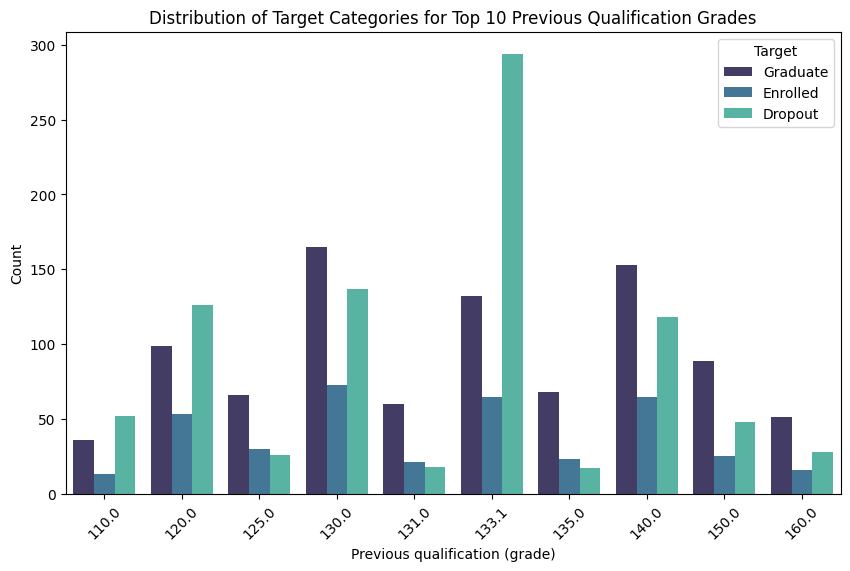

In [ ]:
feature = 'Previous qualification (grade)'
explore_numeric(df, feature);
#This feature had a very high cardinality
top_n = 10
top_categories = df['Previous qualification (grade)'].value_counts().head(top_n).index
df_top = df[df['Previous qualification (grade)'].isin(top_categories)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, x='Previous qualification (grade)', hue='Target', palette='mako')
plt.title(f'Distribution of Target Categories for Top {top_n} Previous Qualification Grades')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Nationality

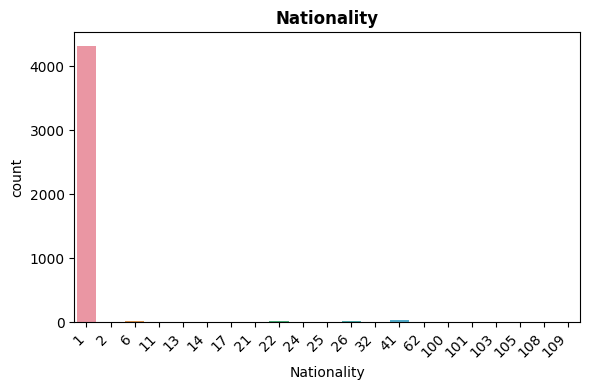

- NaN's Found: 0 (0.0%)
- Unique Values: 21
- Most common value: '1' occurs 4314 times (97.51%)
- Not constant or quasi-constant.


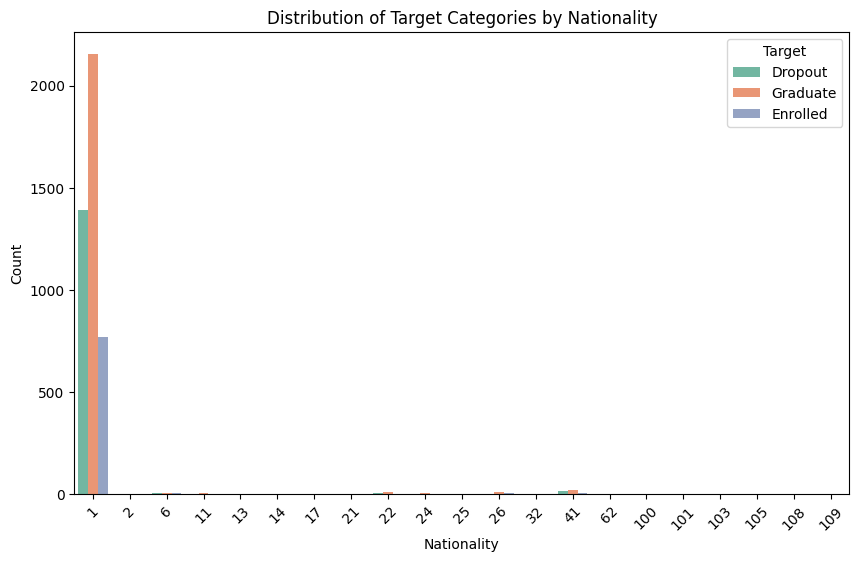

In [ ]:
feature = 'Nationality'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Nationality', hue='Target', palette='Set2')
plt.title('Distribution of Target Categories by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- Most students are Portugese, since this data was conducted in Portugal and has the highest rate of graduates.

### Mother's Qualification

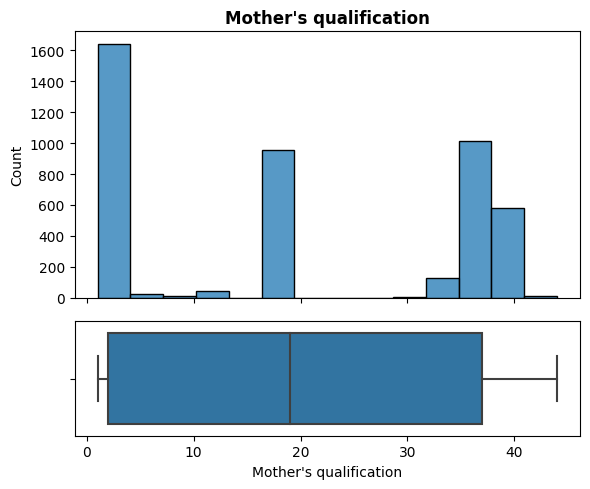

- NaN's Found: 0 (0.0%)
- Unique Values: 29
- Most common value: '1' occurs 1069 times (24.16%)
- Not constant or quasi-constant.


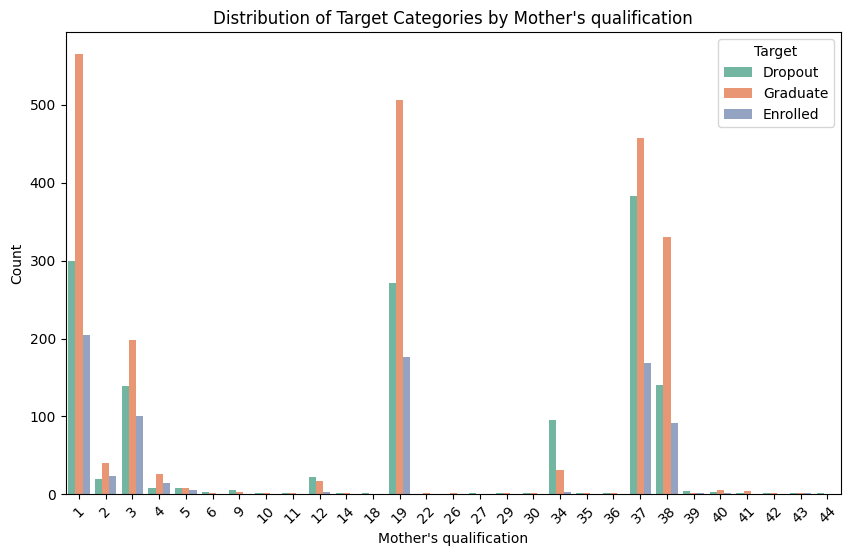

In [ ]:
feature = "Mother's qualification"
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Mother's qualification", hue='Target', palette='Set2')
plt.title("Distribution of Target Categories by Mother's qualification")
plt.xlabel("Mother's qualification")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- highest count is :1 - Secondary Education - 12th Year of Schooling or Eq. in addition this category has the highest rate of graduates.
- The level 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. has the second highest rate of graduates.
- the level 37 - Basic education 1st cycle (4th/5th year) or equiv.has the highest rate of dropout students.


### Father's Qualification

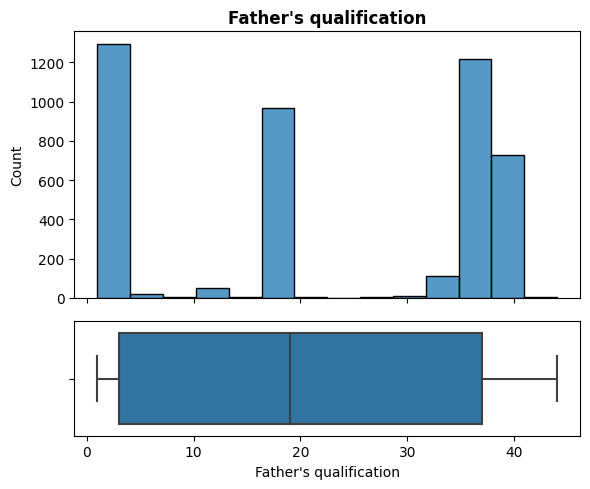

- NaN's Found: 0 (0.0%)
- Unique Values: 34
- Most common value: '37' occurs 1209 times (27.33%)
- Not constant or quasi-constant.


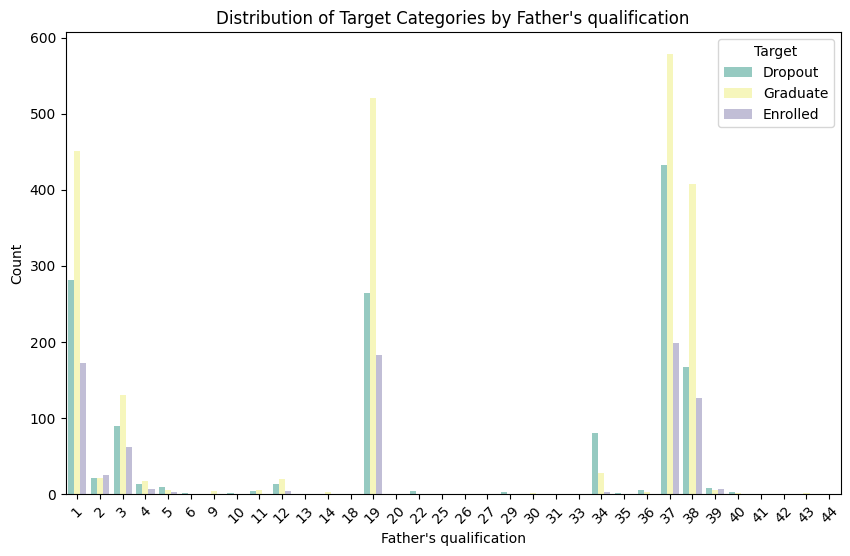

In [ ]:
feature = "Father's qualification"
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Father's qualification", hue='Target', palette='Set3')
plt.title("Distribution of Target Categories by Father's qualification")
plt.xlabel("Father's qualification")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

-highest count is 37 - Basic education 1st cycle (4th/5th year) or equiv. and also has the highest rate of graduates.

### Mother's Occupation

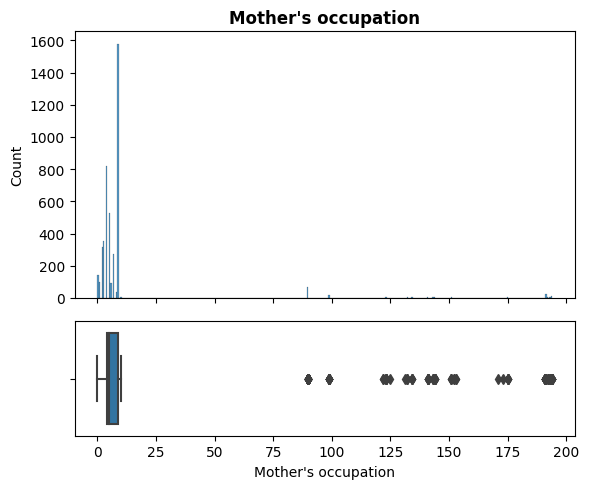

- NaN's Found: 0 (0.0%)
- Unique Values: 32
- Most common value: '9' occurs 1577 times (35.65%)
- Not constant or quasi-constant.


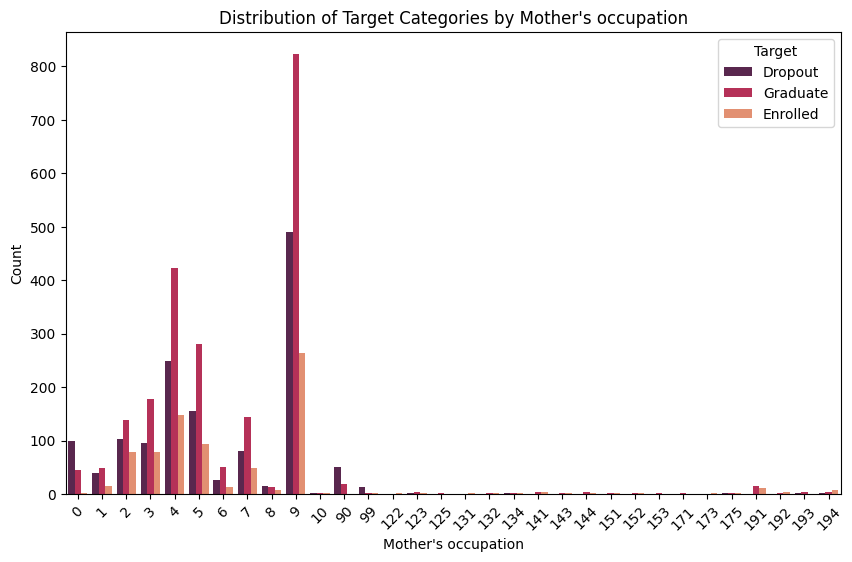

In [ ]:
feature = "Mother's occupation"
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Mother's occupation", hue='Target', palette='rocket')
plt.title("Distribution of Target Categories by Mother's occupation")
plt.xlabel("Mother's occupation")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- highest count is  9 - Unskilled Workers with the highest rate of graduates.

### Father's Occupation

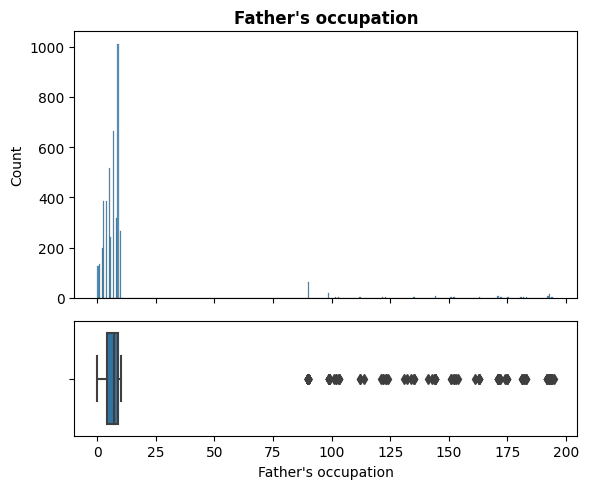

- NaN's Found: 0 (0.0%)
- Unique Values: 46
- Most common value: '9' occurs 1010 times (22.83%)
- Not constant or quasi-constant.


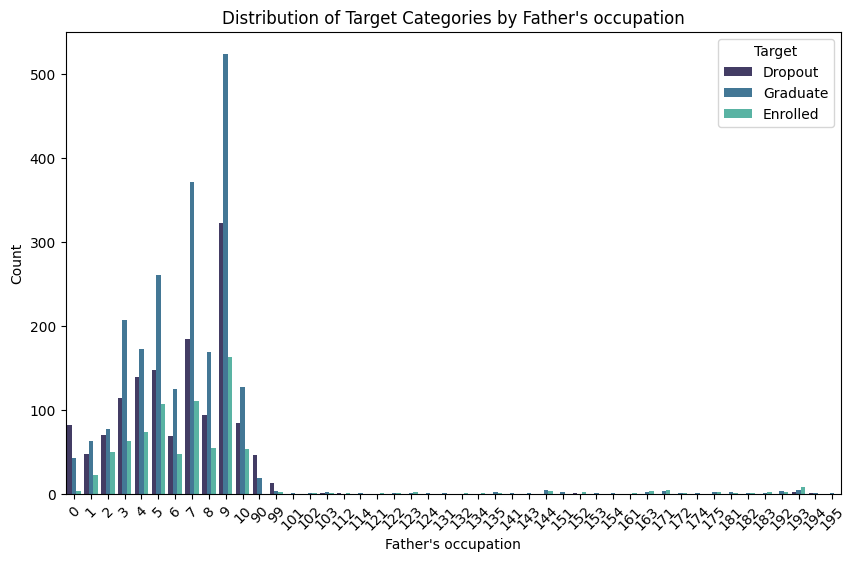

In [ ]:
feature = "Father's occupation"
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Father's occupation", hue='Target', palette='mako')
plt.title("Distribution of Target Categories by Father's occupation")
plt.xlabel("Father's occupation")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- highest count is  9 - Unskilled Workers with the highest rate of graduates.

### Admission Grade

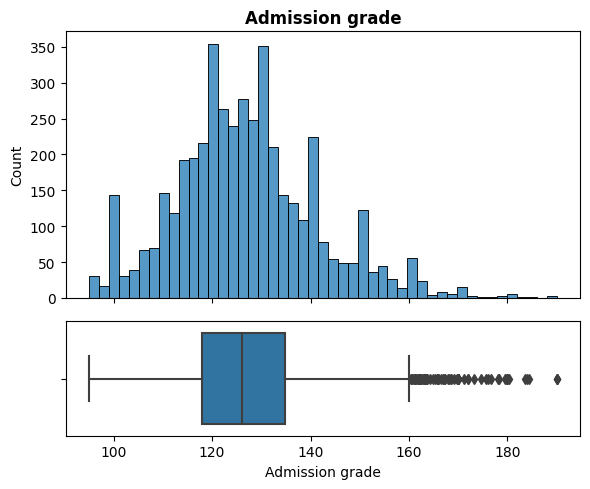

- NaN's Found: 0 (0.0%)
- Unique Values: 620
- Most common value: '130.0' occurs 162 times (3.66%)
- Not constant or quasi-constant.


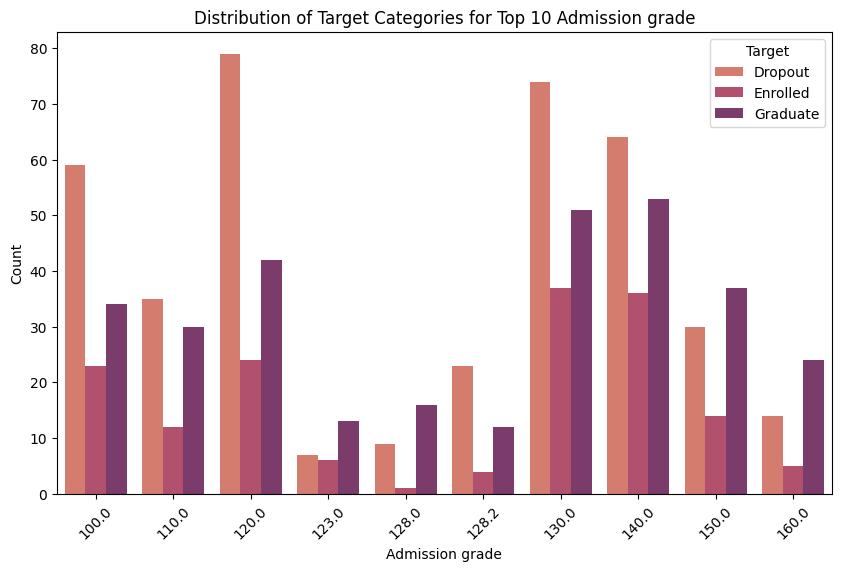

In [ ]:
feature = 'Admission grade'
explore_numeric(df, feature);
#This feature had a very high cardinality
top_n = 10
top_categories = df['Admission grade'].value_counts().head(top_n).index
df_top = df[df['Admission grade'].isin(top_categories)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, x='Admission grade', hue='Target', palette='flare')
plt.title(f'Distribution of Target Categories for Top {top_n} Admission grade')
plt.xlabel('Admission grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- One outlier higher than 180 in admission grade.It is determined here that in the lowest admission grade the droput rate is the high but not as high as those with the score greater than 110 but less than 120.

### Displaced

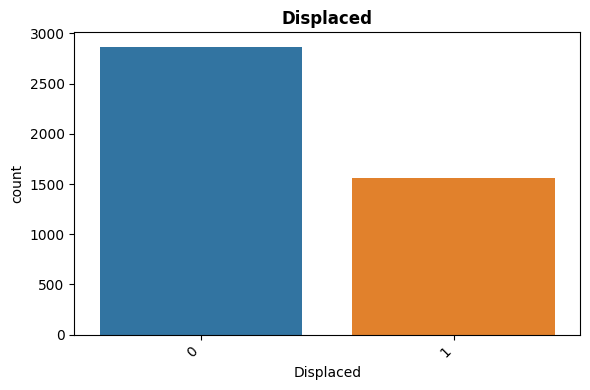

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 2868 times (64.83%)
- Not constant or quasi-constant.


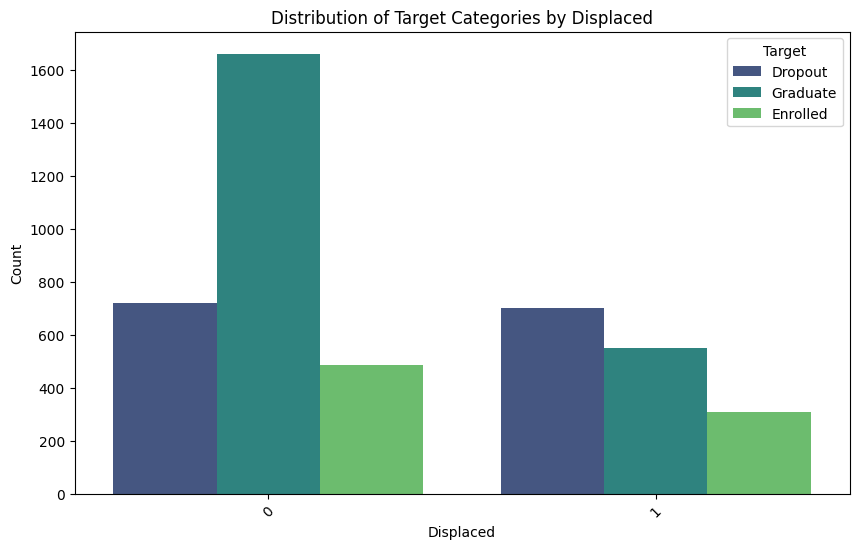

In [ ]:
feature = 'Displaced'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Displaced', hue='Target', palette='viridis')
plt.title('Distribution of Target Categories by Displaced')
plt.xlabel('Displaced')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- Most students were not displaced. For the displaced students the dropout count is higher than any other outcome.

### Educational Special Needs

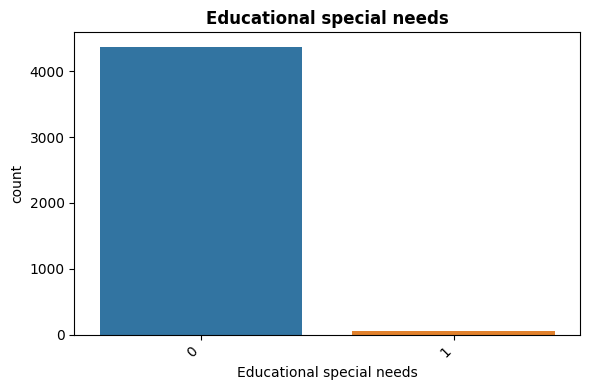

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4373 times (98.85%)

- [!] Warning: 'Educational special needs' is a constant or quasi-constant feature and should be dropped.


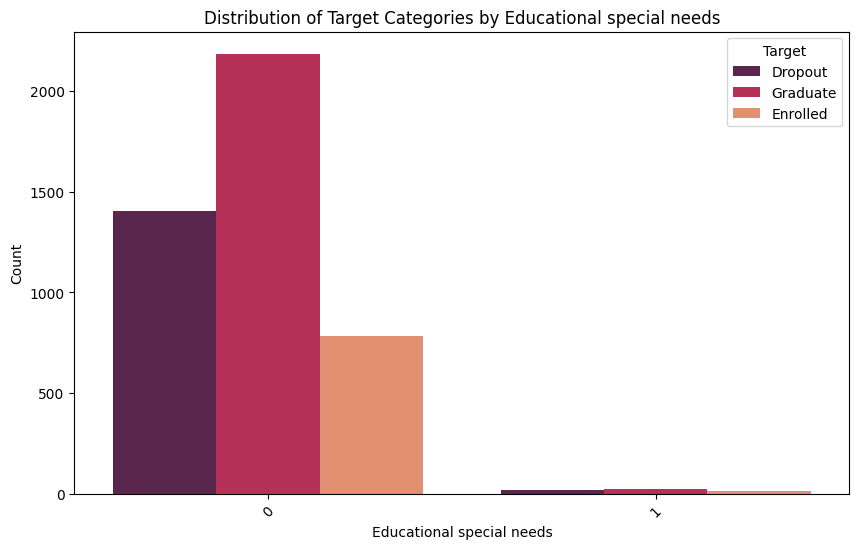

In [ ]:
feature = 'Educational special needs'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Educational special needs', hue='Target', palette='rocket')
plt.title('Distribution of Target Categories by Educational special needs')
plt.xlabel('Educational special needs')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Debtor

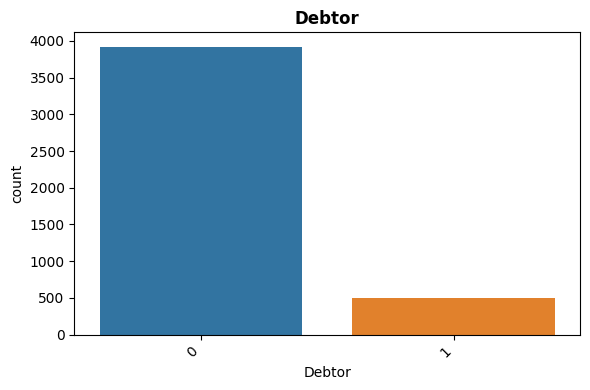

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 3921 times (88.63%)
- Not constant or quasi-constant.


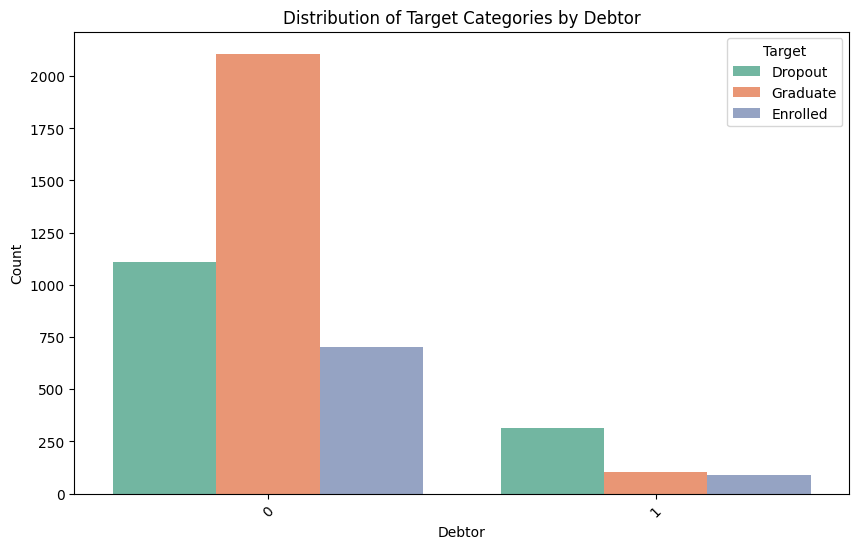

In [ ]:
feature = 'Debtor'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Debtor', hue='Target', palette='Set2')
plt.title('Distribution of Target Categories by Debtor')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')



- 88.63% of students are not in debt.

### Tuition Fees up to Date

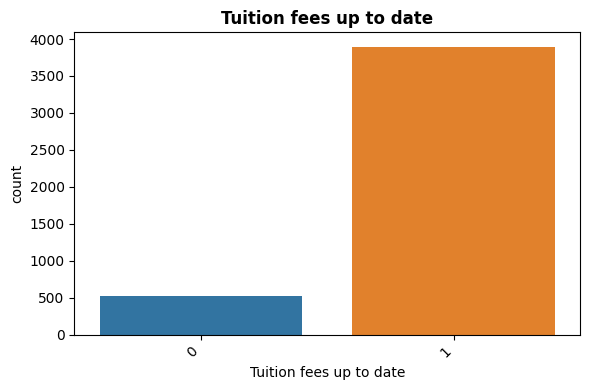

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1' occurs 3896 times (88.07%)
- Not constant or quasi-constant.


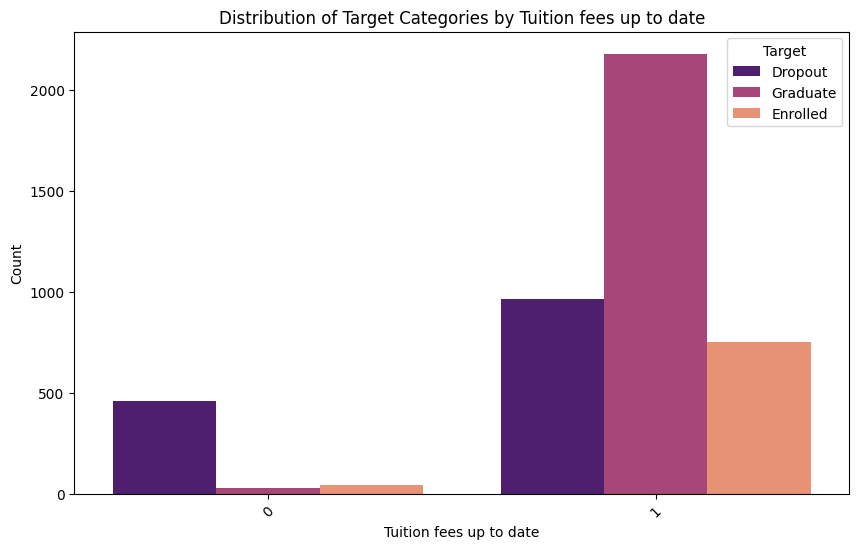

In [ ]:
feature = 'Tuition fees up to date'
explore_categorical(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tuition fees up to date', hue='Target', palette='magma')
plt.title('Distribution of Target Categories by Tuition fees up to date')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- Most students are up to date with their tuition fees and most graduate.

### Gender

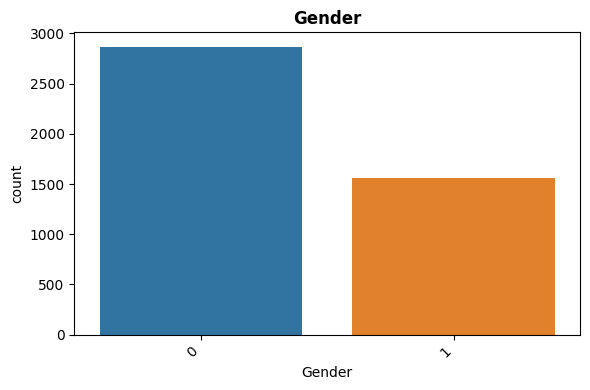

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 2868 times (64.83%)
- Not constant or quasi-constant.


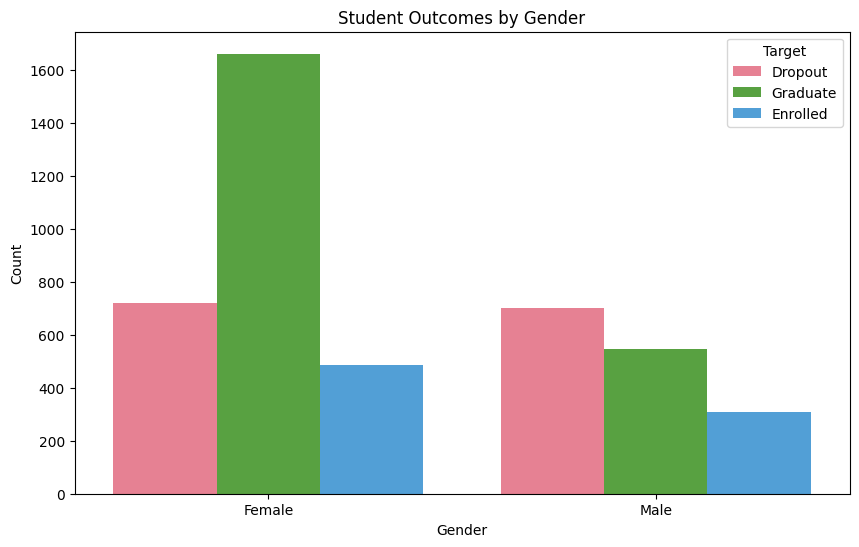

In [ ]:
feature = 'Gender'
explore_categorical(df, feature);


# Create a countplot with gender labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, hue='Target', x='Gender', palette='husl')
plt.title('Student Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks([0, 1], ['Female', 'Male'])  # Adding custom x-axis labels
plt.show();

- Most students are female and most graduate

### Scholarship Holder

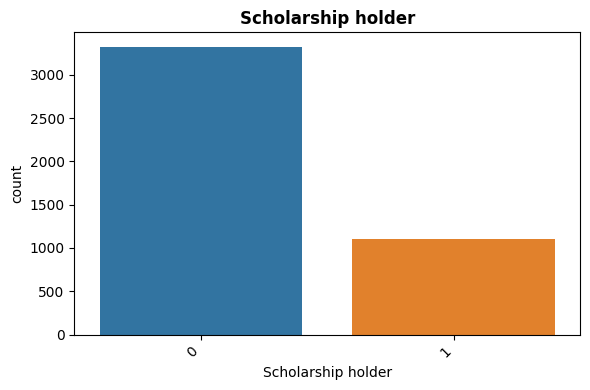

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 3325 times (75.16%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Scholarship holder'
explore_categorical(df, feature);


- Most students are not scholarship holders.

### Age at Enrollment

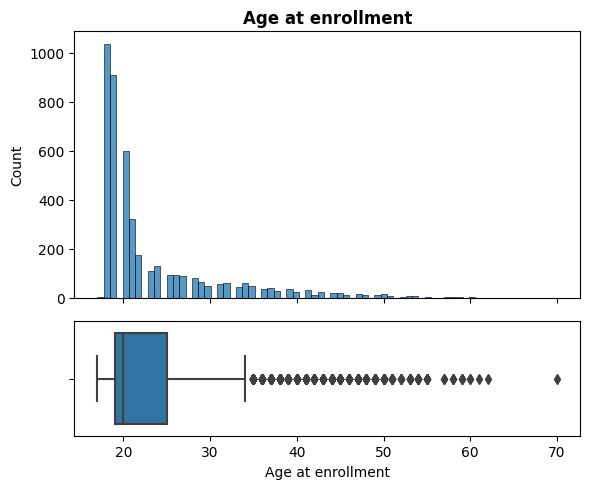

- NaN's Found: 0 (0.0%)
- Unique Values: 46
- Most common value: '18' occurs 1036 times (23.42%)
- Not constant or quasi-constant.


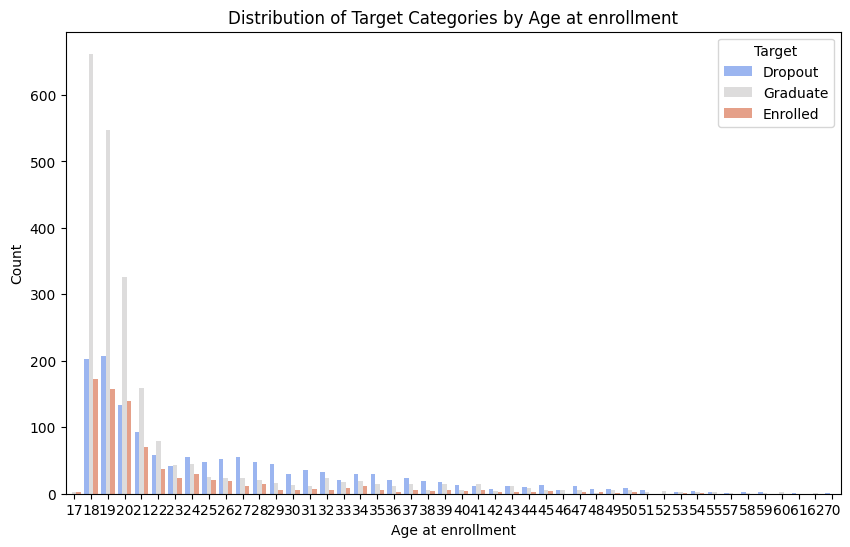

In [ ]:
feature = 'Age at enrollment'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age at enrollment', hue='Target', palette='coolwarm')
plt.title('Distribution of Target Categories by Age at enrollment')
plt.xlabel('Age at enrollment')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

- One outlier a student's age at the age of enrollment is 70. Most graduates are 18.

### International

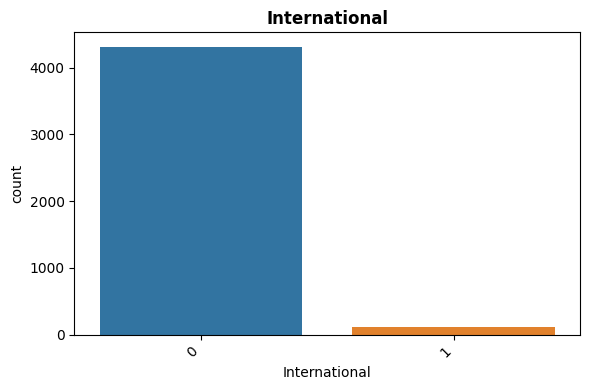

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4314 times (97.51%)
- Not constant or quasi-constant.


In [ ]:
feature = 'International'
explore_categorical(df, feature);


- Most students are not international

### Curricular units 1st sem (credited)

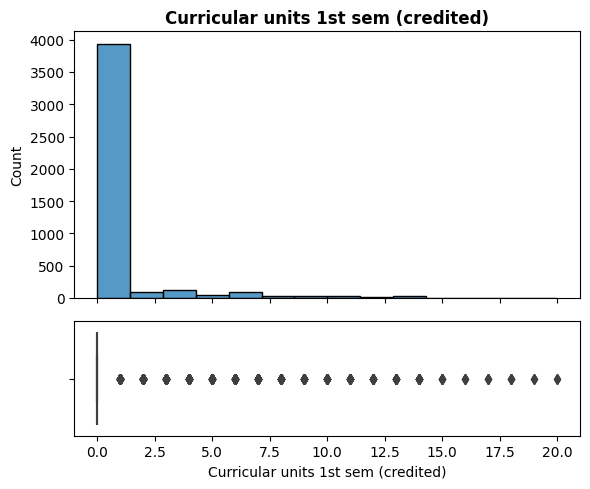

- NaN's Found: 0 (0.0%)
- Unique Values: 21
- Most common value: '0' occurs 3847 times (86.96%)
- Not constant or quasi-constant.


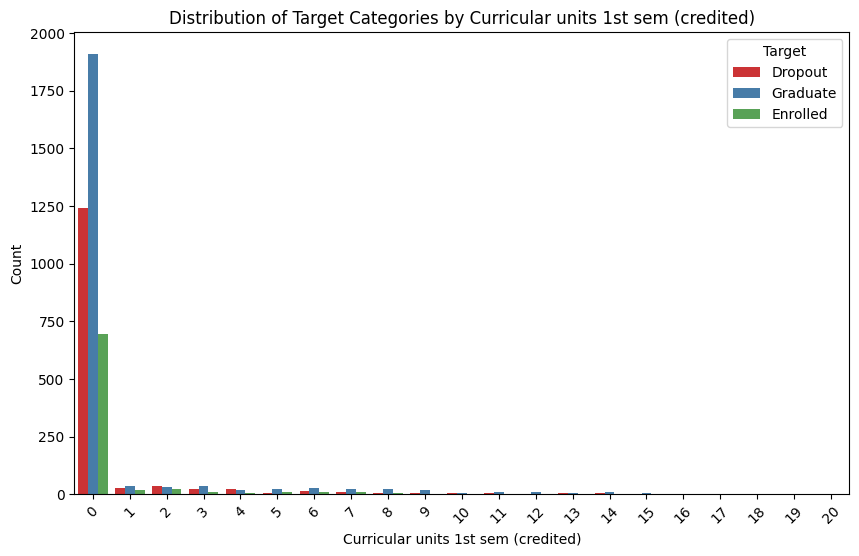

In [ ]:
feature = 'Curricular units 1st sem (credited)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 1st sem (credited)', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Curricular units 1st sem (credited)' )
plt.xlabel('Curricular units 1st sem (credited)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 1st sem (enrolled)

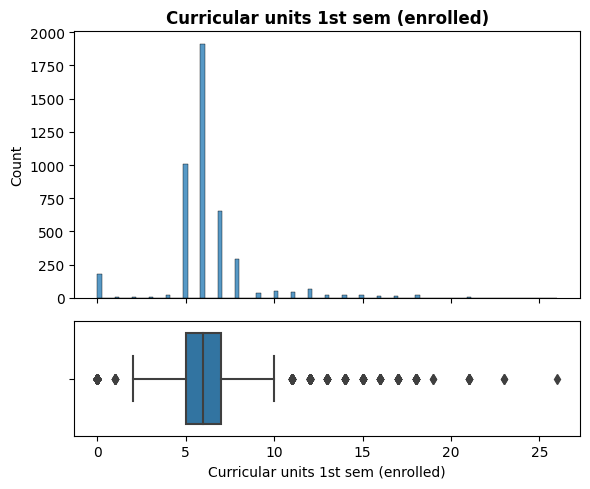

- NaN's Found: 0 (0.0%)
- Unique Values: 23
- Most common value: '6' occurs 1910 times (43.17%)
- Not constant or quasi-constant.


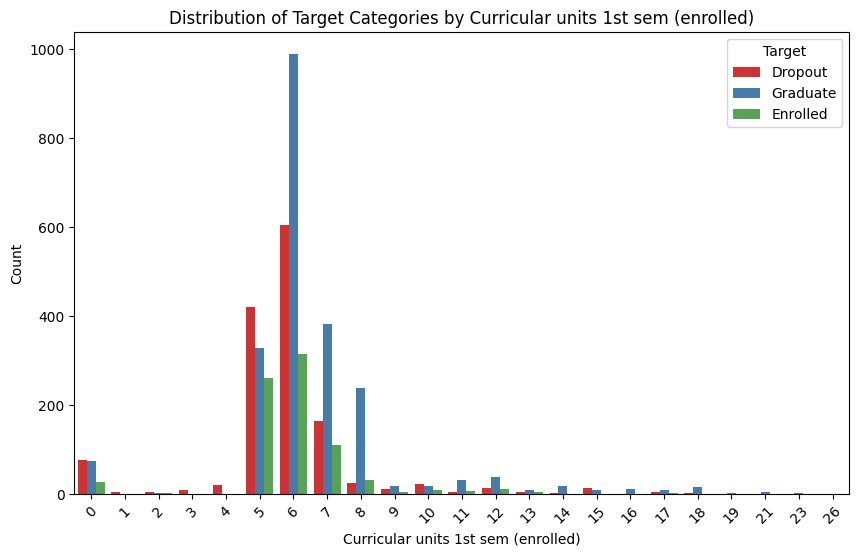

In [ ]:
feature = 'Curricular units 1st sem (enrolled)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 1st sem (enrolled)', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Curricular units 1st sem (enrolled)')
plt.xlabel('Curricular units 1st sem (enrolled)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 1st sem (evaluations)

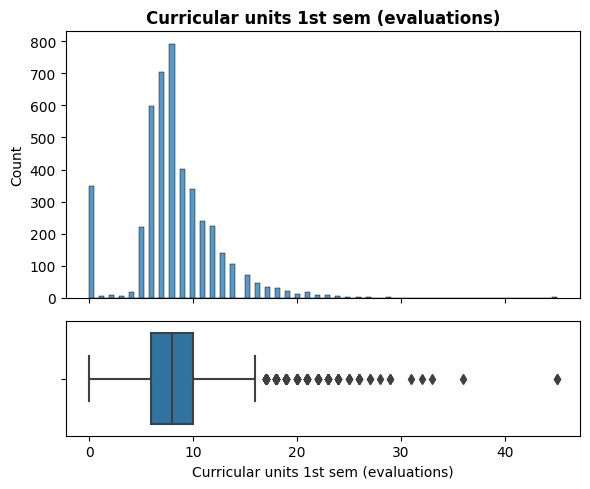

- NaN's Found: 0 (0.0%)
- Unique Values: 35
- Most common value: '8' occurs 791 times (17.88%)
- Not constant or quasi-constant.


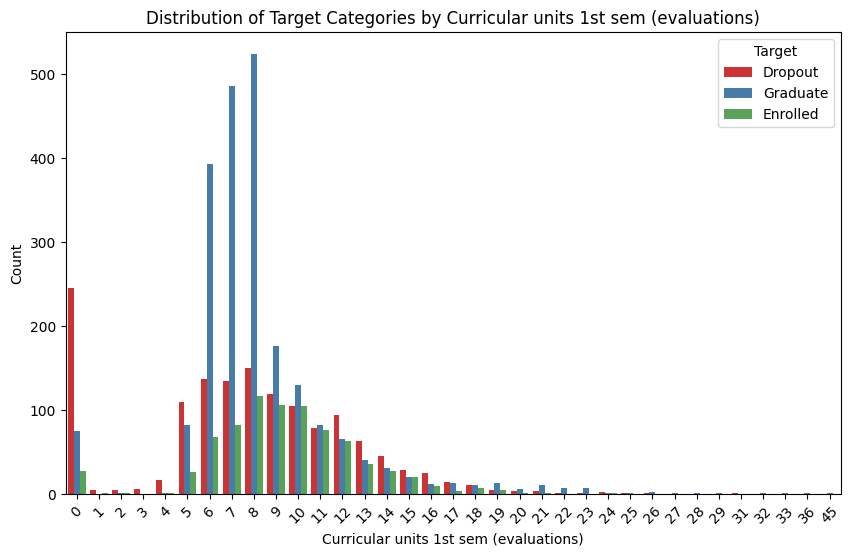

In [ ]:
feature = 'Curricular units 1st sem (evaluations)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 1st sem (evaluations)', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Curricular units 1st sem (evaluations)' )
plt.xlabel('Curricular units 1st sem (evaluations)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 1st sem (approved)

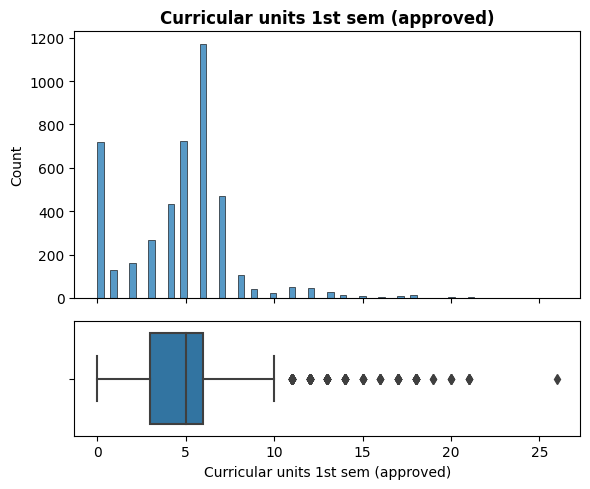

- NaN's Found: 0 (0.0%)
- Unique Values: 23
- Most common value: '6' occurs 1171 times (26.47%)
- Not constant or quasi-constant.


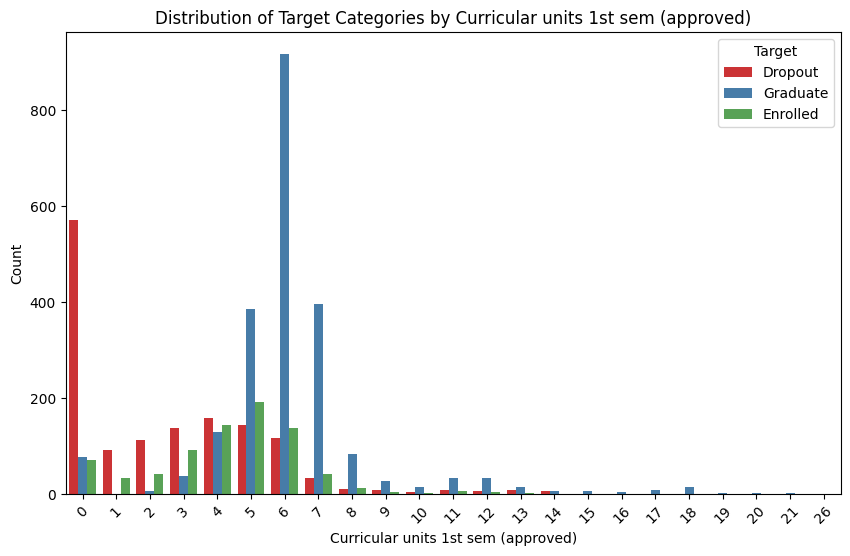

In [ ]:
feature = 'Curricular units 1st sem (approved)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 1st sem (approved)', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Curricular units 1st sem (approved)' )
plt.xlabel('Curricular units 1st sem (approved)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 1st sem (grade)

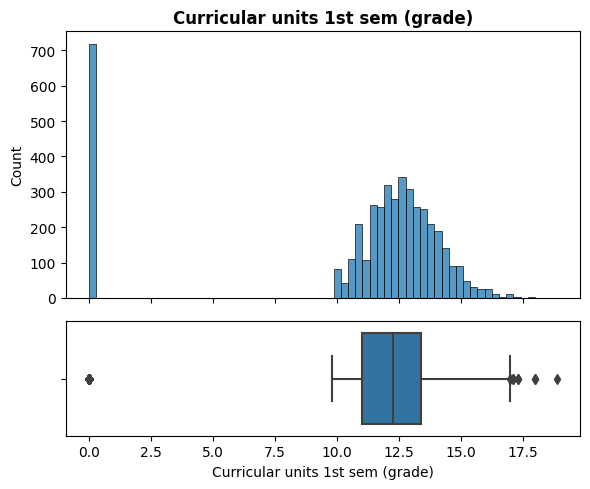

- NaN's Found: 0 (0.0%)
- Unique Values: 797
- Most common value: '0.0' occurs 718 times (16.23%)
- Not constant or quasi-constant.


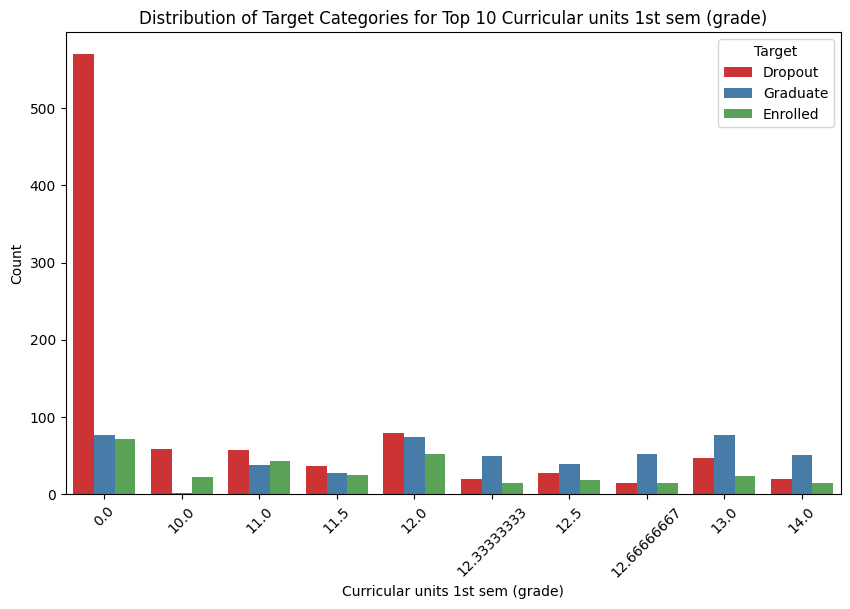

In [ ]:
feature = 'Curricular units 1st sem (grade)'
explore_numeric(df, feature);
#This feature had a very high cardinality
top_n = 10
top_categories = df['Curricular units 1st sem (grade)'].value_counts().head(top_n).index
df_top = df[df['Curricular units 1st sem (grade)'].isin(top_categories)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, x='Curricular units 1st sem (grade)', hue='Target', palette='Set1')
plt.title(f'Distribution of Target Categories for Top {top_n} Curricular units 1st sem (grade)')
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 1st sem (without evaluations)

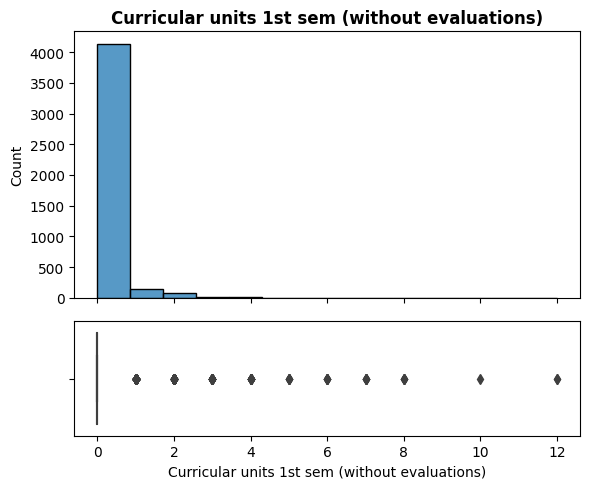

- NaN's Found: 0 (0.0%)
- Unique Values: 11
- Most common value: '0' occurs 4130 times (93.35%)
- Not constant or quasi-constant.


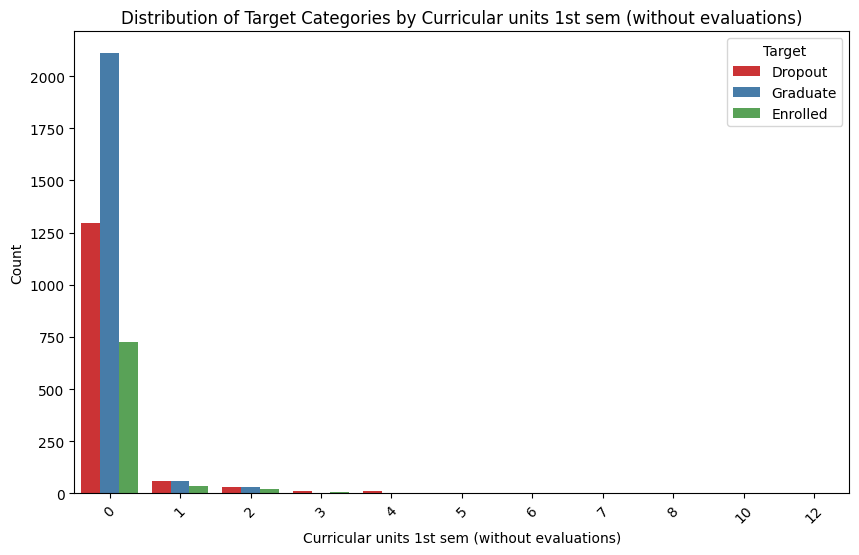

In [ ]:
feature = 'Curricular units 1st sem (without evaluations)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 1st sem (without evaluations)', hue='Target', palette='Set1')
plt.title('Distribution of Target Categories by Curricular units 1st sem (without evaluations)' )
plt.xlabel('Curricular units 1st sem (without evaluations)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 2nd sem (credited)

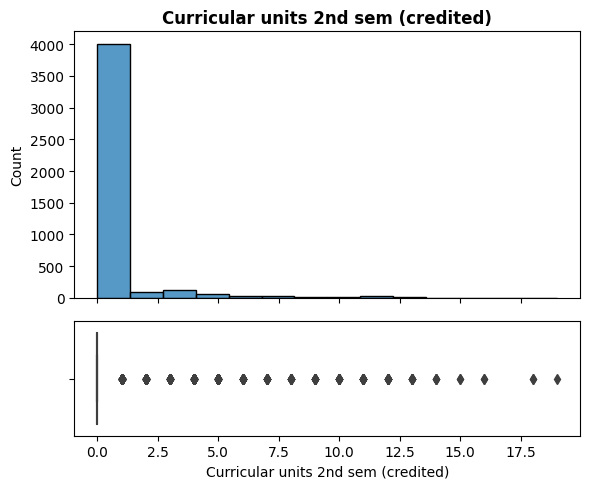

- NaN's Found: 0 (0.0%)
- Unique Values: 19
- Most common value: '0' occurs 3894 times (88.02%)
- Not constant or quasi-constant.


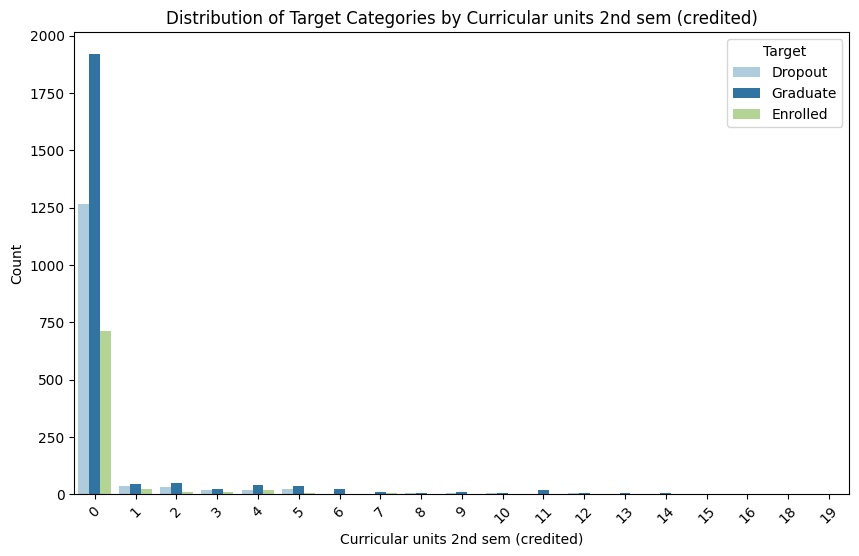

In [ ]:
feature = 'Curricular units 2nd sem (credited)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 2nd sem (credited)', hue='Target', palette='Paired')
plt.title('Distribution of Target Categories by Curricular units 2nd sem (credited)')
plt.xlabel('Curricular units 2nd sem (credited)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

### Curricular units 2nd sem (enrolled)

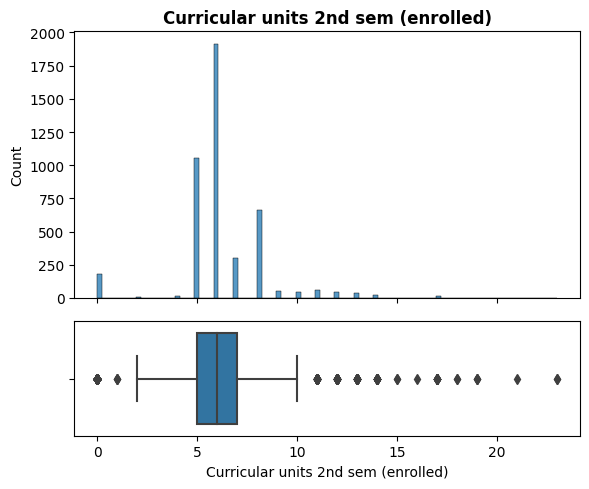

- NaN's Found: 0 (0.0%)
- Unique Values: 22
- Most common value: '6' occurs 1913 times (43.24%)
- Not constant or quasi-constant.


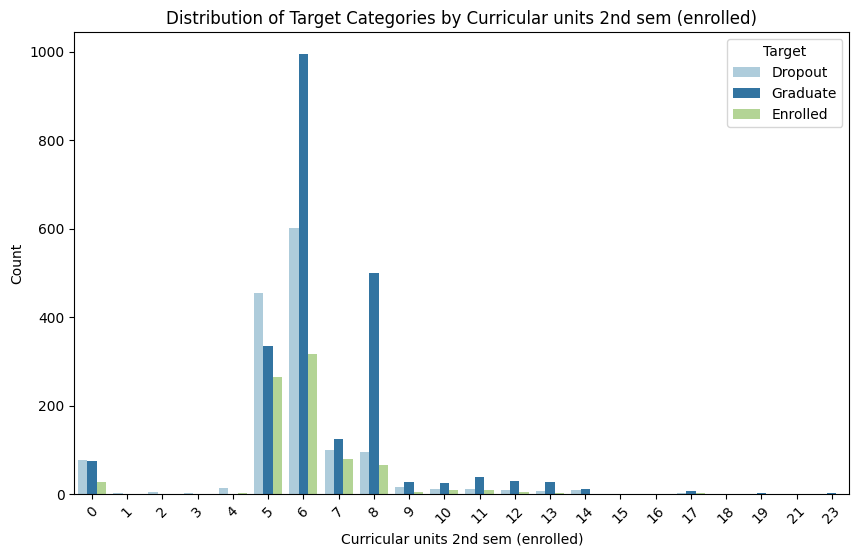

In [ ]:
feature = 'Curricular units 2nd sem (enrolled)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 2nd sem (enrolled)', hue='Target', palette='Paired')
plt.title('Distribution of Target Categories by Curricular units 2nd sem (enrolled)' )
plt.xlabel('Curricular units 2nd sem (enrolled)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- Outlier at 0 and above 10.

### Curricular units 2nd sem (evaluations)

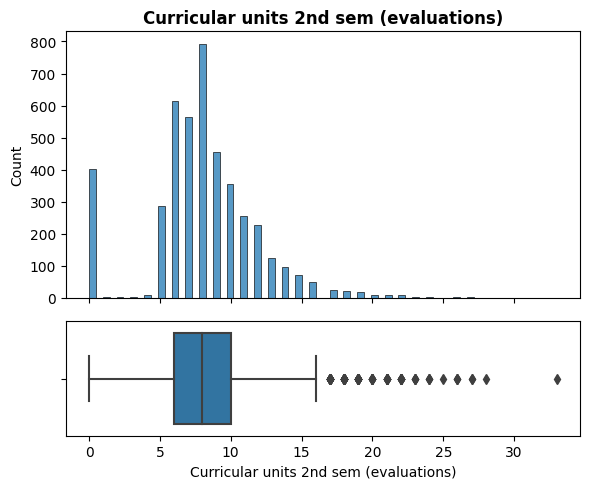

- NaN's Found: 0 (0.0%)
- Unique Values: 30
- Most common value: '8' occurs 792 times (17.9%)
- Not constant or quasi-constant.


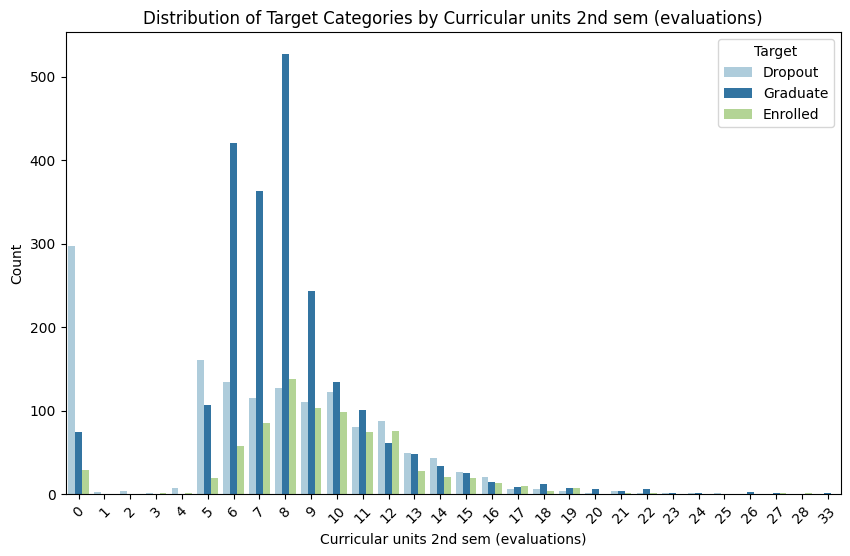

In [ ]:
feature = 'Curricular units 2nd sem (evaluations)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 2nd sem (evaluations)', hue='Target', palette='Paired')
plt.title('Distribution of Target Categories by Curricular units 2nd sem (evaluations)')
plt.xlabel('Curricular units 2nd sem (evaluations)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- outlier above 30.

### Curricular units 2nd sem (approved)

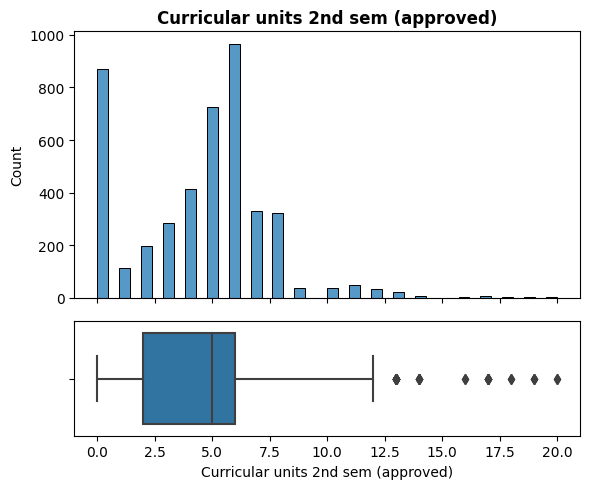

- NaN's Found: 0 (0.0%)
- Unique Values: 20
- Most common value: '6' occurs 965 times (21.81%)
- Not constant or quasi-constant.


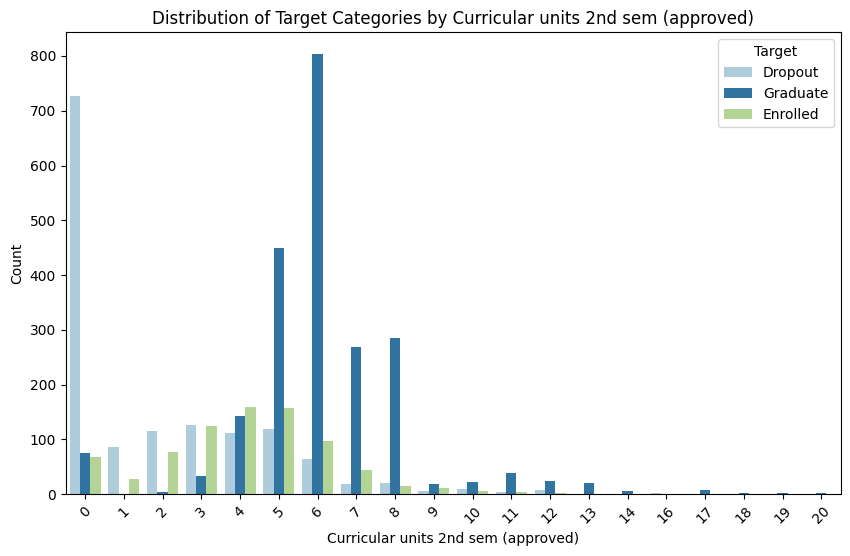

In [ ]:
feature = 'Curricular units 2nd sem (approved)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 2nd sem (approved)', hue='Target', palette='Paired')
plt.title('Distribution of Target Categories by Curricular units 2nd sem (approved)')
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- outliers are above 12.5

### Curricular units 2nd sem (grade)

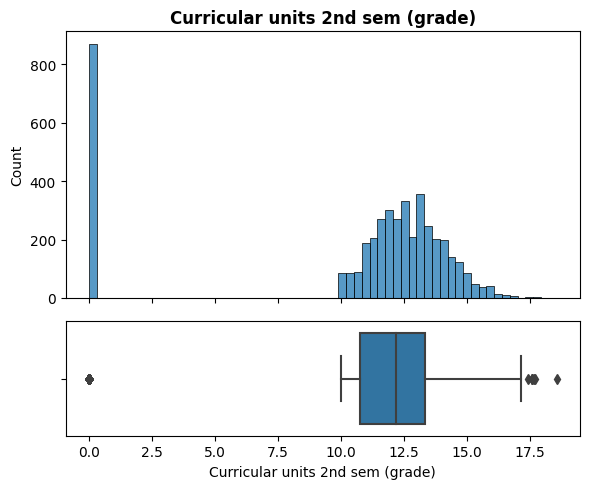

- NaN's Found: 0 (0.0%)
- Unique Values: 782
- Most common value: '0.0' occurs 870 times (19.67%)
- Not constant or quasi-constant.


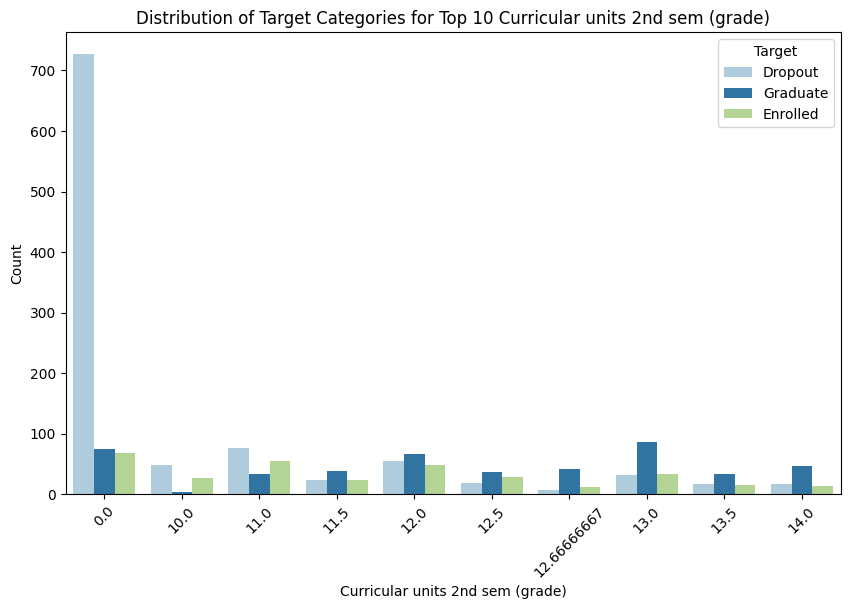

In [ ]:
feature = 'Curricular units 2nd sem (grade)'
explore_numeric(df, feature);
#This feature had a very high cardinality
top_n = 10
top_categories = df['Curricular units 2nd sem (grade)'].value_counts().head(top_n).index
df_top = df[df['Curricular units 2nd sem (grade)'].isin(top_categories)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, x='Curricular units 2nd sem (grade)', hue='Target', palette='Paired')
plt.title(f'Distribution of Target Categories for Top {top_n} Curricular units 2nd sem (grade)')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- 0.0 and over 17.5 are the outliers.

### Curricular units 2nd sem (without evaluations)

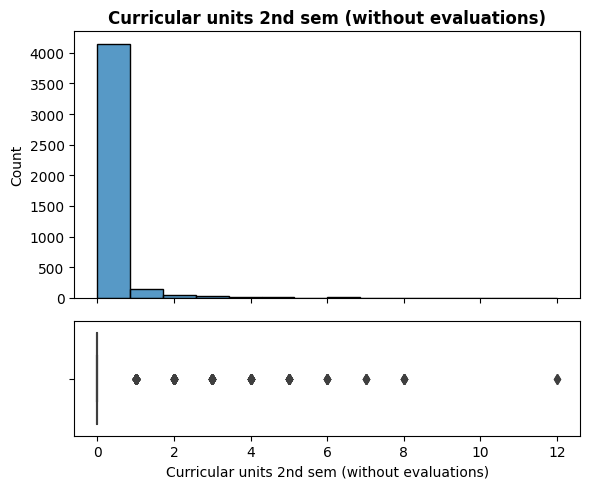

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '0' occurs 4142 times (93.63%)
- Not constant or quasi-constant.


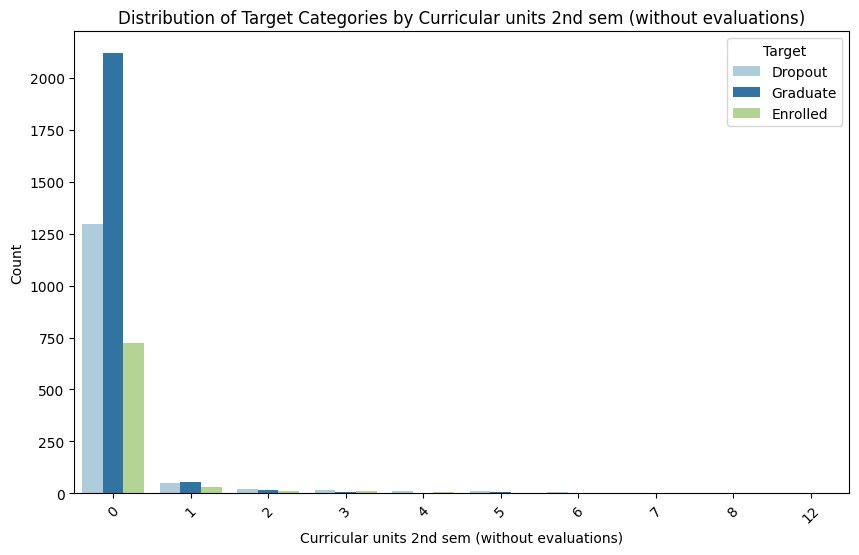

In [ ]:
feature = 'Curricular units 2nd sem (without evaluations)'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Curricular units 2nd sem (without evaluations)', hue='Target', palette='Paired')
plt.title('Distribution of Target Categories by Curricular units 2nd sem (without evaluations)' )
plt.xlabel('Curricular units 2nd sem (without evaluations)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- 12 units in evaluations is the outlier in this feature.

### Unemployment rate

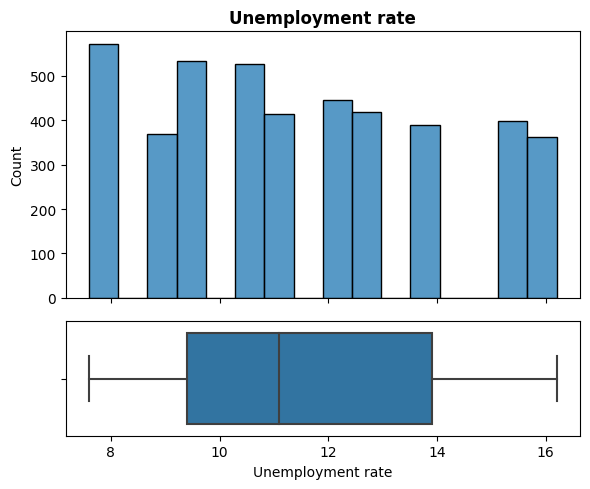

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '7.6' occurs 571 times (12.91%)
- Not constant or quasi-constant.


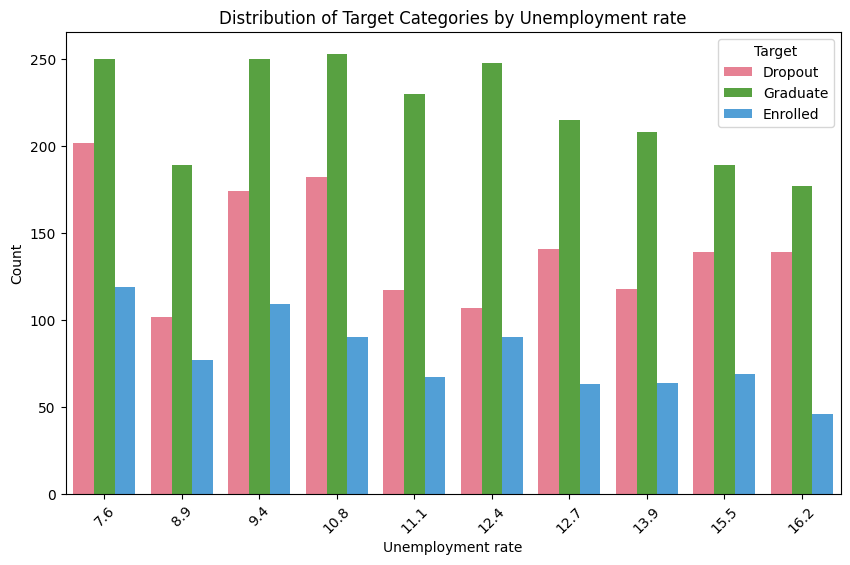

In [ ]:
feature = 'Unemployment rate'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Unemployment rate', hue='Target', palette='husl')
plt.title('Distribution of Target Categories by Unemployment rate')
plt.xlabel('Unemployment rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- No outliers

### Inflation rate

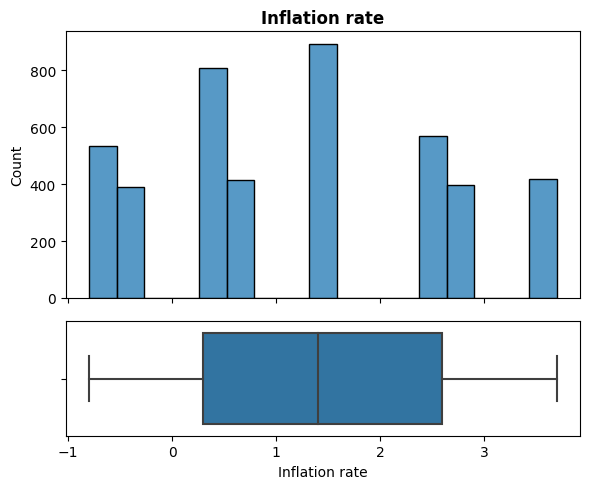

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1.4' occurs 893 times (20.19%)
- Not constant or quasi-constant.


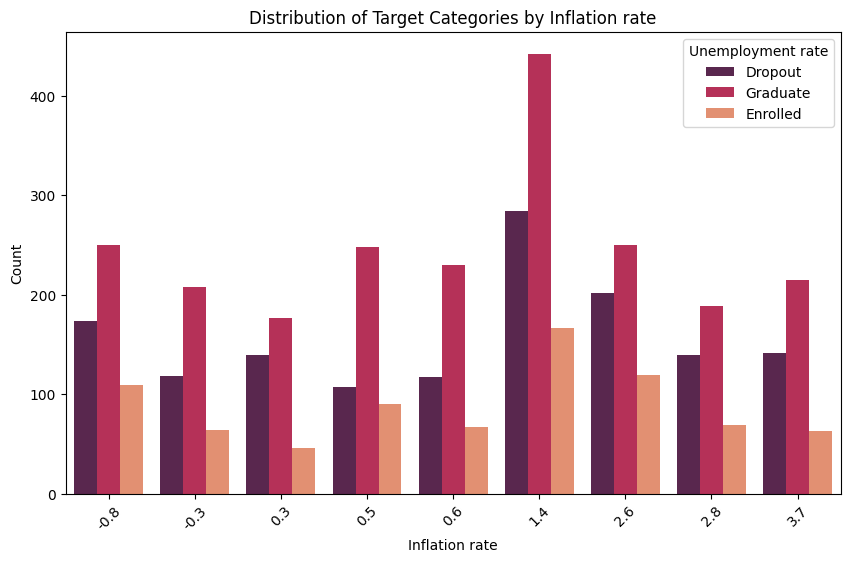

In [ ]:
feature = 'Inflation rate'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Inflation rate', hue='Target', palette='rocket')
plt.title('Distribution of Target Categories by Inflation rate')
plt.xlabel('Inflation rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Unemployment rate')
plt.show()

- No outliers

### GDP


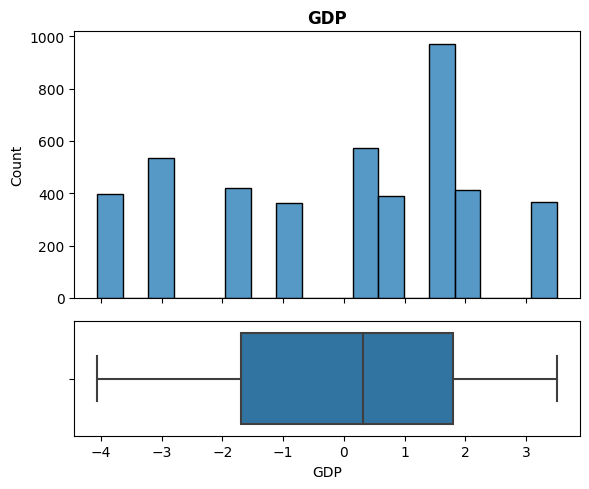

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '0.32' occurs 571 times (12.91%)
- Not constant or quasi-constant.


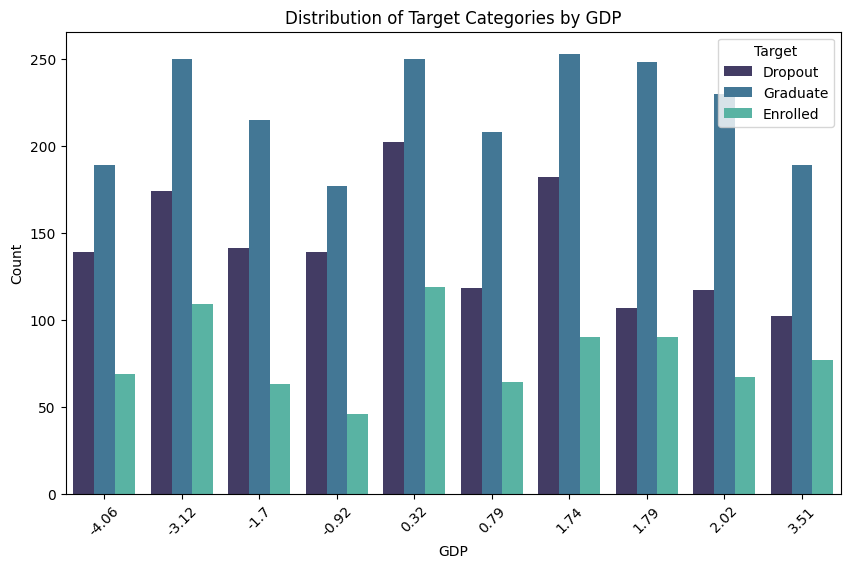

In [ ]:
feature = 'GDP'
explore_numeric(df, feature);
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GDP', hue='Target', palette='mako')
plt.title('Distribution of Target Categories by GDP')
plt.xlabel('GDP')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

- No outliers

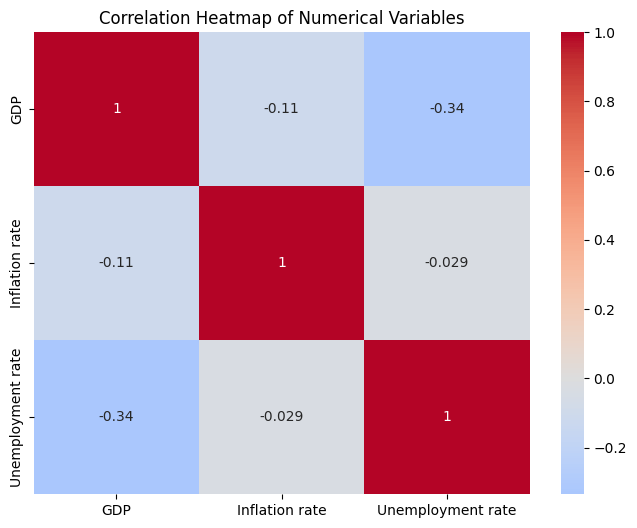

In [ ]:
numerical_columns = ['GDP','Inflation rate','Unemployment rate']
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Correlation:

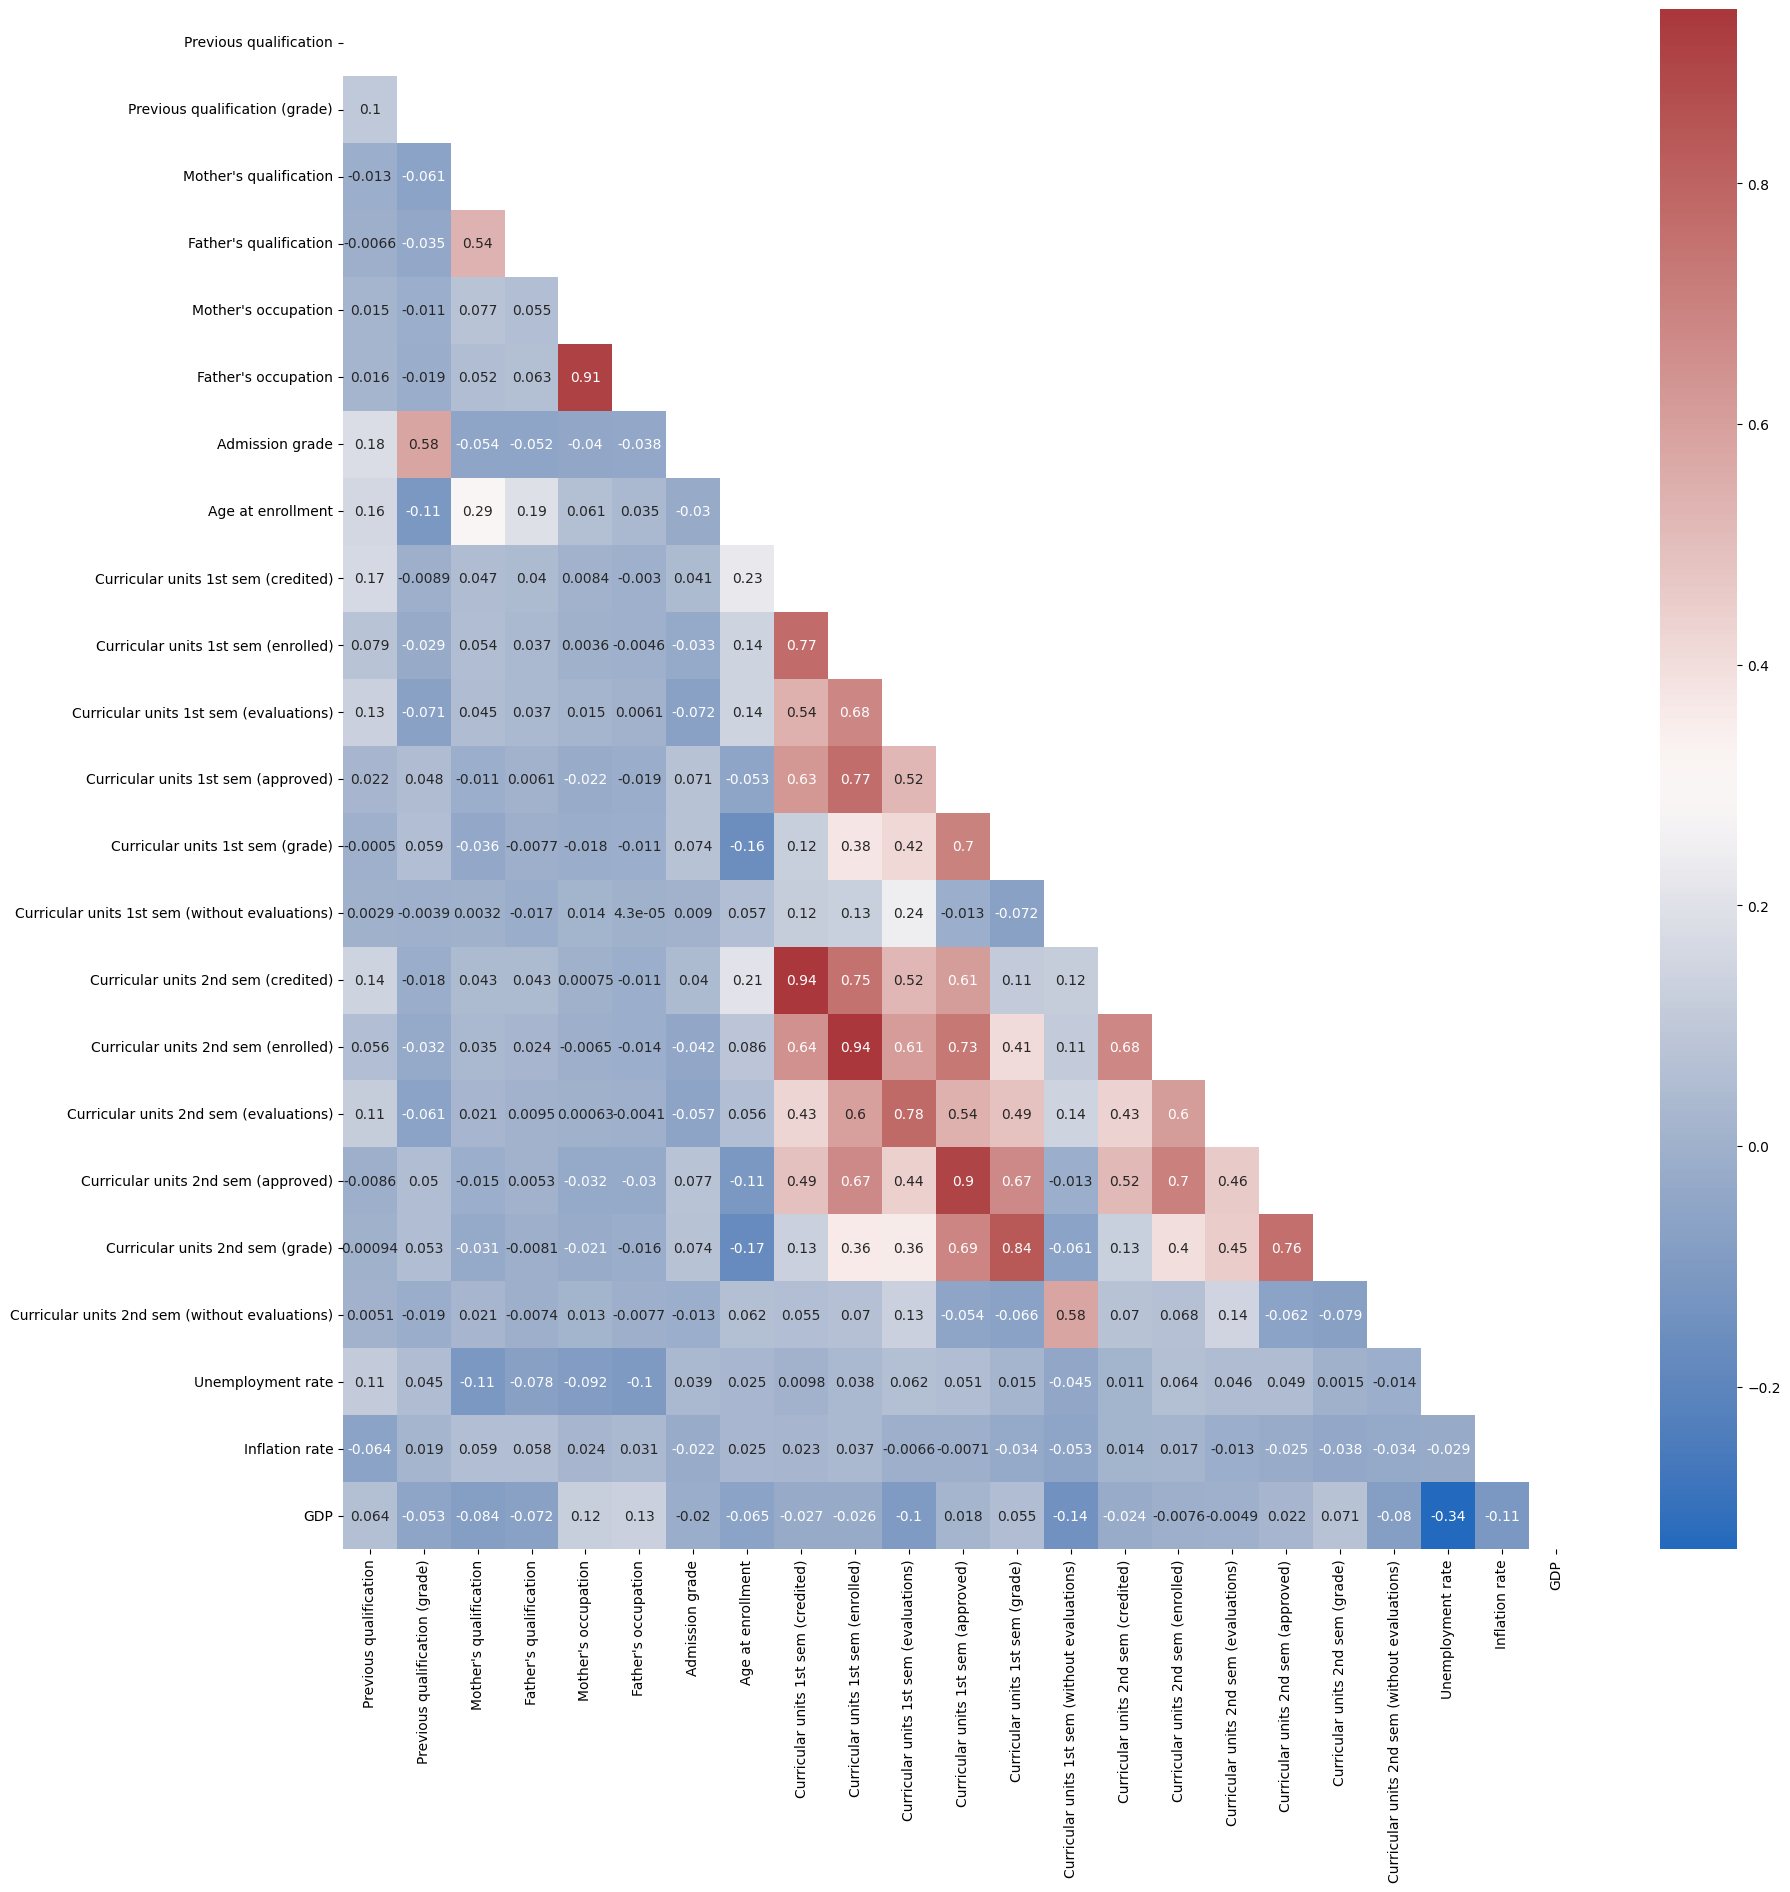

In [ ]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr, cmap= 'vlag', annot = True, mask = mask);

It has been observed that there is a remarkably high correlation of 94% between two pairs of variables:

Curricular Units 1st Semester Enrolled and Curricular Units 1st Semester Credited.
Curricular Units 2nd Semester Enrolled and Curricular Units 2nd Semester Credited.
This strong correlation suggests a significant trend among students who successfully pass and move on to the next semester. When students enroll in and pass their curricular units during the first semester, they are very likely to have those same units credited. Additionally, the trend continues into the second semester: students who enroll and pass their curricular units for the second semester are also likely to have those units credited.

This observation implies a high level of consistency and success in students' academic progress. Passing the first semester's curricular units seems to be a reliable indicator of successful progression, as evidenced by the strong correlation with credited units. This pattern persists into the second semester, reinforcing the idea that students who succeed early are more likely to continue succeeding in subsequent semesters.

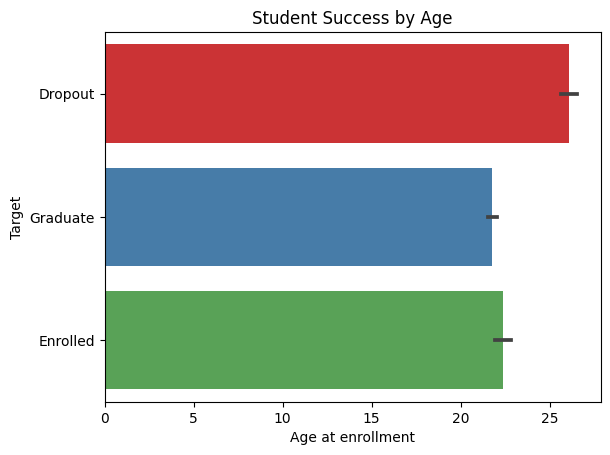

In [ ]:
ax = sns.barplot(data = df,
                 x = 'Age at enrollment',
                 y = 'Target', palette='Set1')

ax.set_title('Student Success by Age');

- This visualization reveals a clear pattern: as students' age at enrollment increases, dropout rates also rise. This highlights the need for focused support for students in this age group. By addressing the underlying factors, institutions can take effective steps to reduce dropout rates and enhance student success

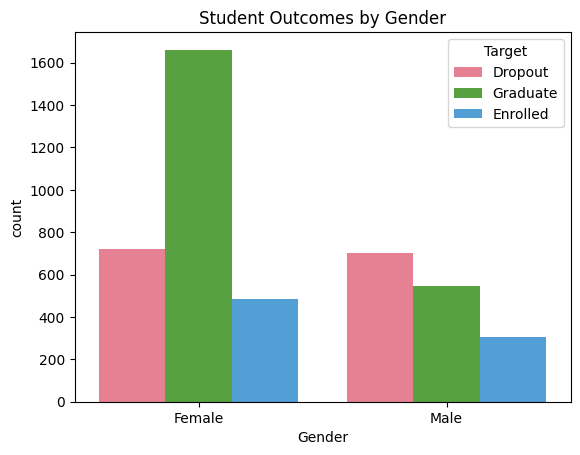

In [ ]:
ax = sns.countplot(data=df, hue='Target', x='Gender', palette='husl');
ax.set(title='Student Outcomes by Gender')
plt.xticks([0, 1], ['Female', 'Male']);  # Adding custom x-axis labels



- This visualization demonstrates a higher graduation rate for females. While this progress is commendable, it raises questions about the lower enrollment and graduation rates among males. Understanding these factors can help address disparities and promote equal educational outcomes.

# Modeling

 *Models and Feature engineering*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report


In [ ]:
def eval_regression(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
  scores['MAE'] = [mean_absolute_error(true, pred)]
  scores['R2'] = [r2_score(true, pred)]
  return scores
def evaluate_classification1(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

def eval_classification(true, pred, name='Model'):
    """shows classification_report and confusion matrix
    for the model predictions"""

    print(name, '\n')
    print(classification_report(true, pred))
    ConfusionMatrixDisplay.from_predictions(true, pred)
    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]


    scores['Precision'] = [precision_score(true, pred, average='weighted')]
    scores['Recall'] = [recall_score(true, pred, average='weighted')]
    scores['F1 Score'] = [f1_score(true, pred, average='weighted')]

    scores['Accuracy'] = [accuracy_score(true, pred)]

    return scores



In [ ]:
ml_df = df.copy()
X = ml_df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')


num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(missing_imputer, ohe)

preprocessor = ColumnTransformer(
    transformers=[
        ('Numeric', num_pipe, num_cols),
        ('Categorical', cat_pipe, cat_cols)],verbose_feature_names_out=False)

print(preprocessor.fit_transform(X_train).shape)

(3318, 106)


### Decision Tree

In [ ]:
scores = pd.DataFrame()

dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

y_pred = dec_tree_pipe.predict(X_test)


train_pred = dec_tree_pipe.predict(X_train)
test_pred = dec_tree_pipe.predict(X_test)


Train 

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1047
    Enrolled       1.00      1.00      1.00       597
    Graduate       1.00      1.00      1.00      1674

    accuracy                           1.00      3318
   macro avg       1.00      1.00      1.00      3318
weighted avg       1.00      1.00      1.00      3318



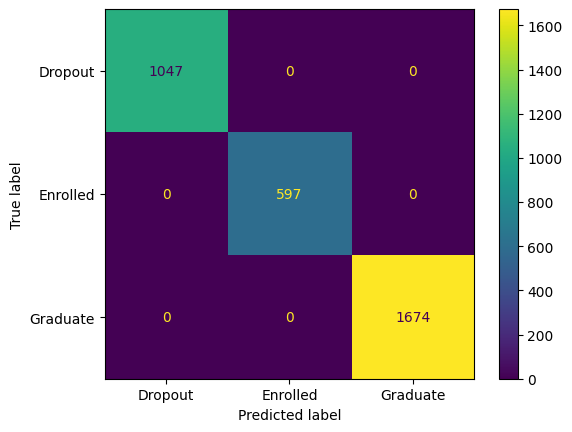

Test 

              precision    recall  f1-score   support

     Dropout       0.70      0.70      0.70       374
    Enrolled       0.33      0.34      0.33       197
    Graduate       0.79      0.79      0.79       535

    accuracy                           0.68      1106
   macro avg       0.61      0.61      0.61      1106
weighted avg       0.68      0.68      0.68      1106



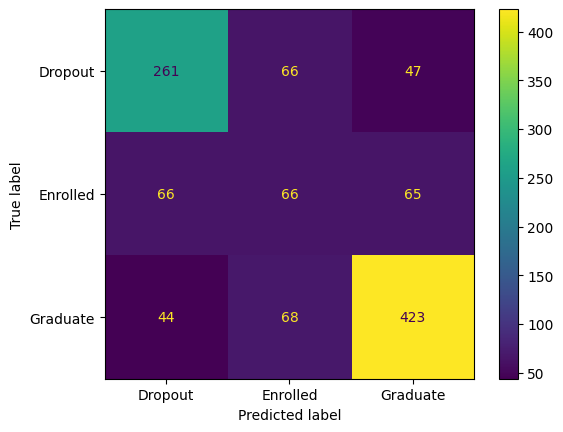

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Train,1.000000,1.000000,1.000000,1.000000
0,Test,0.679132,0.678119,0.678619,0.678119


In [ ]:
# evaluate model
train_scores = eval_classification(y_train, train_pred, name='Train')

test_scores = eval_classification(y_test, test_pred, name='Test')

dec_tree_scores = pd.concat([train_scores, test_scores])
dec_tree_scores

In [ ]:
# Making every other value from the range (odd values)
dec_tree_list = list(range(1,33,2))
dec_tree_list



[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [ ]:
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x792984a4a350>),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                 

In [ ]:

params={'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': 42,
 'decisiontreeclassifier__splitter': 'best'}



In [ ]:
params = {
    'decisiontreeclassifier__ccp_alpha': [0.0]
}

gs = GridSearchCV(dec_tree_pipe, params, verbose=True, n_jobs=-1)
gs.fit(X_train, y_train)
best_params = gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
pd.set_option('display.max_columns',50)
# Getting the cv_results as a dataframe
cv_results = pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119469,0.006991,0.019191,0.001309,0.0,{'decisiontreeclassifier__ccp_alpha': 0.0},0.677711,0.673193,0.692771,0.669683,0.699849,0.682641,0.011664,1


GridSearch Decision Tree 

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1047
    Enrolled       1.00      1.00      1.00       597
    Graduate       1.00      1.00      1.00      1674

    accuracy                           1.00      3318
   macro avg       1.00      1.00      1.00      3318
weighted avg       1.00      1.00      1.00      3318



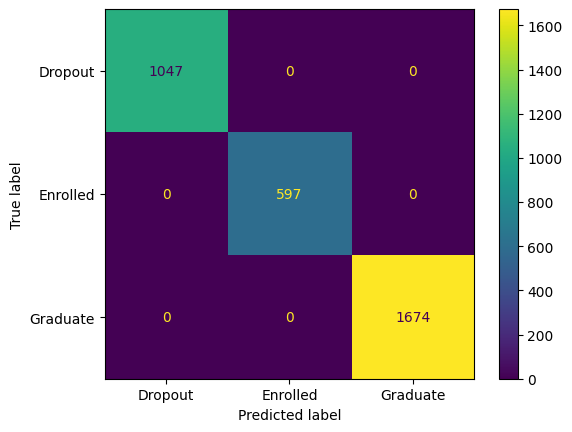

,Model Name,Precision,Recall,F1 Score,Accuracy
0,GridSearch Decision Tree,1.0,1.0,1.0,1.0


In [ ]:
# Get predictions from the best estimator
y_pred = gs.best_estimator_.predict(X_train)

# Evaluate the predictions using the evaluation function
eval_classification(y_train, y_pred, name='GridSearch Decision Tree')


### Decision Tree with PCA and Polynomial features

In [ ]:

# Preprocessor with PolynomialFeatures
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('Numeric', num_pipe, num_cols),
        ('Categorical', cat_pipe, cat_cols),
        ('Polynomial', PolynomialFeatures(degree=2, include_bias=False), num_cols)],verbose_feature_names_out=False)

# Preprocessor with PCA
pca_preprocessor = ColumnTransformer(
    transformers=[
        ('Numeric', num_pipe, num_cols),
        ('Categorical', cat_pipe, cat_cols),
        ('PCA', PCA(n_components=0.95), num_cols)],verbose_feature_names_out=False)
poly = PolynomialFeatures(degree=2)
pca = PCA(n_components=0.95)



Decision Tree with Polynomial Features 

              precision    recall  f1-score   support

     Dropout       0.71      0.68      0.69       374
    Enrolled       0.32      0.31      0.31       197
    Graduate       0.78      0.81      0.79       535

    accuracy                           0.68      1106
   macro avg       0.60      0.60      0.60      1106
weighted avg       0.67      0.68      0.68      1106



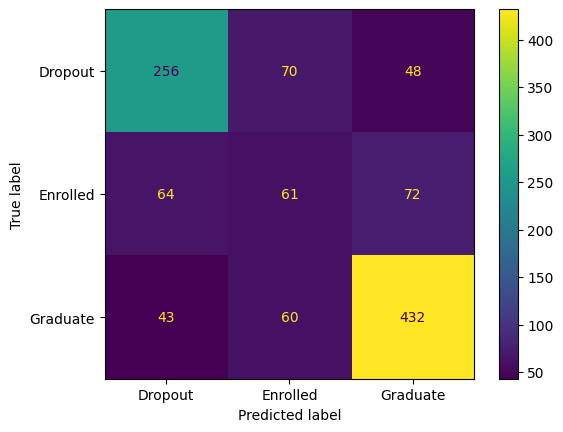

Decision Tree with PCA 

              precision    recall  f1-score   support

     Dropout       0.70      0.68      0.69       374
    Enrolled       0.36      0.38      0.37       197
    Graduate       0.77      0.78      0.78       535

    accuracy                           0.67      1106
   macro avg       0.61      0.61      0.61      1106
weighted avg       0.68      0.67      0.67      1106



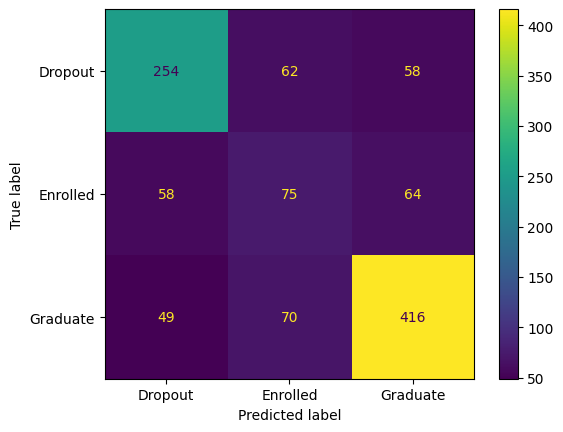

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Decision Tree with PCA,0.676495,0.673599,0.67493,0.673599


In [ ]:
# Decision Tree with PCA
dec_tree_pca_pipe = make_pipeline(pca_preprocessor, DecisionTreeClassifier(random_state=42))

# Decision Tree with Polynomial Features
dec_tree_poly_pipe = make_pipeline(poly_preprocessor, DecisionTreeClassifier(random_state=42))

# Train and evaluate Decision Tree with Polynomial Features
dec_tree_poly_pipe.fit(X_train, y_train)
y_pred_poly = dec_tree_poly_pipe.predict(X_test)
eval_classification(y_test, y_pred_poly, name='Decision Tree with Polynomial Features')

# Train and evaluate Decision Tree with PCA
dec_tree_pca_pipe.fit(X_train, y_train)
y_pred_pca = dec_tree_pca_pipe.predict(X_test)
eval_classification(y_test, y_pred_pca, name='Decision Tree with PCA')



### Logistic Regression

In [ ]:
scores = pd.DataFrame()

logreg = LogisticRegression(C = 3500)
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

y_pred = logreg_pipe.predict(X_test)


train_predlog = logreg_pipe.predict(X_train)
test_predlog = logreg_pipe.predict(X_test)



Train 

              precision    recall  f1-score   support

     Dropout       0.82      0.78      0.80      1047
    Enrolled       0.56      0.35      0.43       597
    Graduate       0.80      0.93      0.86      1674

    accuracy                           0.78      3318
   macro avg       0.73      0.69      0.70      3318
weighted avg       0.76      0.78      0.76      3318



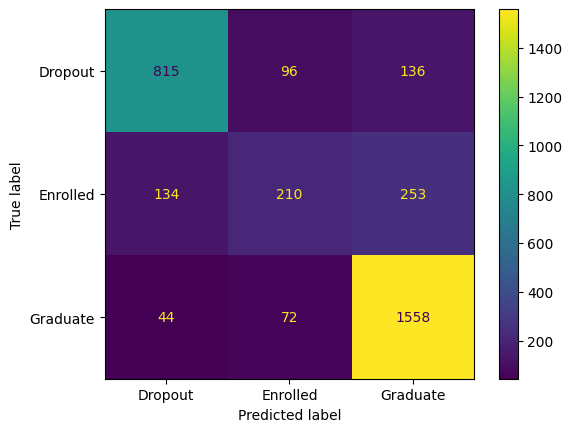

Test 

              precision    recall  f1-score   support

     Dropout       0.81      0.78      0.79       374
    Enrolled       0.48      0.28      0.36       197
    Graduate       0.78      0.92      0.84       535

    accuracy                           0.76      1106
   macro avg       0.69      0.66      0.66      1106
weighted avg       0.74      0.76      0.74      1106



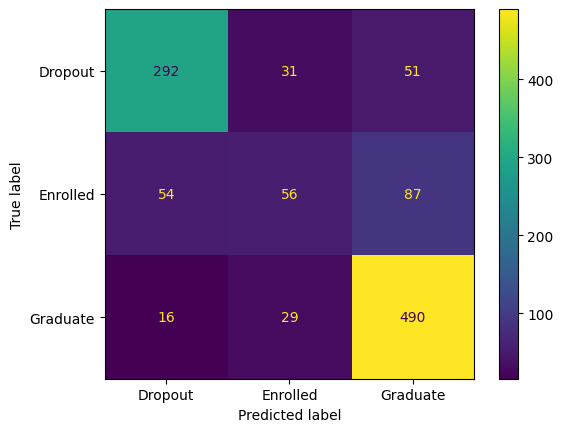

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Train,0.762668,0.778481,0.763797,0.778481
0,Test,0.736184,0.757685,0.739665,0.757685


In [ ]:
# evaluate model
train_scores = eval_classification(y_train, train_predlog, name='Train')

test_scores = eval_classification(y_test, test_predlog, name='Test')

log_scores = pd.concat([train_scores, test_scores])
log_scores


In [ ]:
# Making every other value from the range (odd values)
logreg_list = list(range(1,43,2))
logreg_list



[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]

In [ ]:
logreg_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(C=3500))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(C=3500),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 3500,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [ ]:

params={'logisticregression__C': 3500,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}



In [ ]:
params = {'logisticregression__C': [3500]}


gs = GridSearchCV(logreg_pipe, params, verbose=True, n_jobs=-1)
gs.fit(X_train, y_train)
best_params = gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
pd.set_option('display.max_columns',50)
# Getting the cv_results as a dataframe
cv_results = pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.219841,0.048219,0.010578,0.002633,3500,{'logisticregression__C': 3500},0.77259,0.760542,0.77259,0.754148,0.776772,0.767329,0.008536,1


Gridsearch Logistic Regression  

              precision    recall  f1-score   support

     Dropout       0.82      0.78      0.80      1047
    Enrolled       0.56      0.35      0.43       597
    Graduate       0.80      0.93      0.86      1674

    accuracy                           0.78      3318
   macro avg       0.73      0.69      0.70      3318
weighted avg       0.76      0.78      0.76      3318



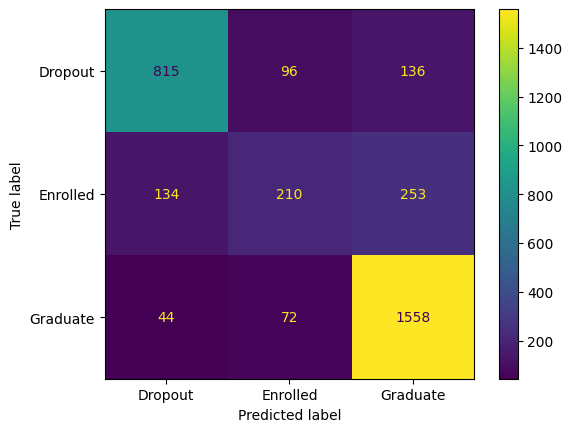

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Gridsearch Logistic Regression,0.762668,0.778481,0.763797,0.778481


In [ ]:
# Get predictions from the best estimator
y_pred = gs.best_estimator_.predict(X_train)

# Evaluate the predictions using the evaluation function
eval_classification(y_train, y_pred, name='Gridsearch Logistic Regression ')


### Logistic Regression with PCA and Polynomial features

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with Polynomial Features 

              precision    recall  f1-score   support

     Dropout       0.71      0.68      0.69       374
    Enrolled       0.32      0.31      0.31       197
    Graduate       0.78      0.81      0.79       535

    accuracy                           0.68      1106
   macro avg       0.60      0.60      0.60      1106
weighted avg       0.67      0.68      0.68      1106



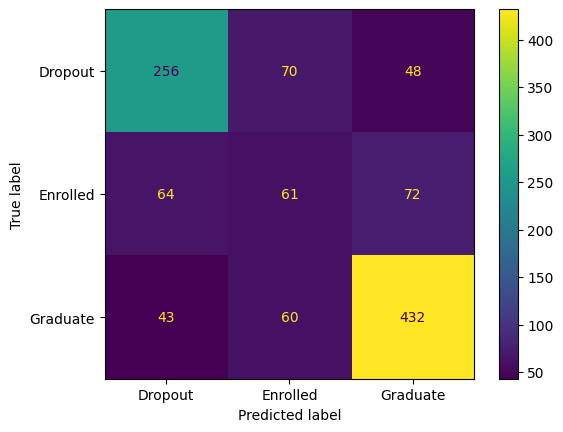

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with PCA 

              precision    recall  f1-score   support

     Dropout       0.70      0.68      0.69       374
    Enrolled       0.36      0.38      0.37       197
    Graduate       0.77      0.78      0.78       535

    accuracy                           0.67      1106
   macro avg       0.61      0.61      0.61      1106
weighted avg       0.68      0.67      0.67      1106



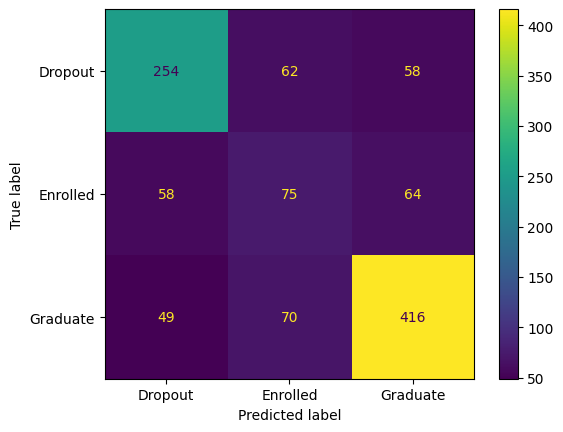

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression with PCA,0.676495,0.673599,0.67493,0.673599


In [ ]:
# Logistic Regression with PCA
logreg_pca_pipe = make_pipeline(pca_preprocessor, LogisticRegression(C=3500, max_iter=1000))

# Logistic Regression with Polynomial Features
logreg_poly_pipe = make_pipeline(poly_preprocessor, LogisticRegression(C=3500, max_iter=1000))

# Train and evaluate Logistic Regression with Polynomial Features
logreg_poly_pipe.fit(X_train, y_train)
y_pred_poly = dec_tree_poly_pipe.predict(X_test)
eval_classification(y_test, y_pred_poly, name='Logistic Regression with Polynomial Features')

# Train and evaluate Logistic Regression with PCA
logreg_pca_pipe.fit(X_train, y_train)
y_pred_pca = dec_tree_pca_pipe.predict(X_test)
eval_classification(y_test, y_pred_pca, name='Logistic Regression with PCA')



In [ ]:
# Create the Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)

# Create a pipeline with the new preprocessor and the Decision Tree model
dec_tree_pipe_with_feat_eng = make_pipeline(dec_tree)

# Fit the model using the transformed training data
dec_tree_pipe_with_feat_eng.fit(X_train_transformed, y_train)

# Predict on the transformed test data
y_pred_with_feat_eng = dec_tree_pipe_with_feat_eng.predict(X_test_transformed)

# Evaluate the model with feature engineering
eval_classification(y_test, y_pred_with_feat_eng, name='Logistic Regression with Feature Engineering')


### Random Forest

In [ ]:
scores = pd.DataFrame()

rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)

train_predrf = rf_pipe.predict(X_train)
test_predrf = rf_pipe.predict(X_test)


Train 

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1047
    Enrolled       1.00      1.00      1.00       597
    Graduate       1.00      1.00      1.00      1674

    accuracy                           1.00      3318
   macro avg       1.00      1.00      1.00      3318
weighted avg       1.00      1.00      1.00      3318



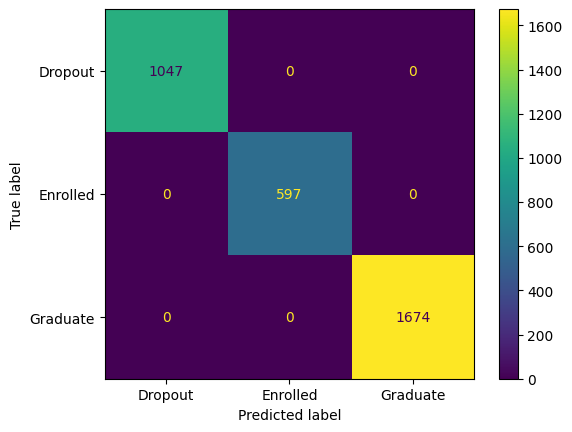

Test 

              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       374
    Enrolled       0.57      0.29      0.38       197
    Graduate       0.77      0.93      0.84       535

    accuracy                           0.76      1106
   macro avg       0.72      0.66      0.67      1106
weighted avg       0.75      0.76      0.74      1106



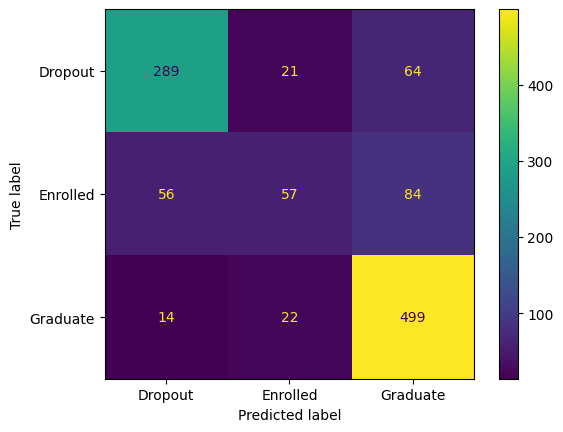

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Train,1.000000,1.000000,1.000000,1.000000
0,Test,0.746822,0.764014,0.743443,0.764014


In [ ]:
# evaluate model
train_scoresrf = eval_classification(y_train, train_predrf, name='Train')

test_scoresrf = eval_classification(y_test, test_predrf, name='Test')

rf_scores = pd.concat([train_scoresrf, test_scoresrf])
rf_scores

In [ ]:
# Making every other value from the range (odd values)
rf_list = list(range(1,51,2))
rf_list



[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [ ]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x792984a4a350>),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                 

In [ ]:

params={'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': 42,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False}




In [ ]:
params = {'randomforestclassifier__max_depth': [None]}

gs = GridSearchCV(rf_pipe, params, verbose=True, n_jobs=-1)
gs.fit(X_train, y_train)
best_params = gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
pd.set_option('display.max_columns',50)
# Getting the cv_results as a dataframe
cv_results = pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.018641,0.190994,0.06104,0.019201,None,{'randomforestclassifier__max_depth': None},0.769578,0.78012,0.787651,0.778281,0.770739,0.777274,0.006614,1


Gridsearch Random Forest 

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1047
    Enrolled       1.00      1.00      1.00       597
    Graduate       1.00      1.00      1.00      1674

    accuracy                           1.00      3318
   macro avg       1.00      1.00      1.00      3318
weighted avg       1.00      1.00      1.00      3318



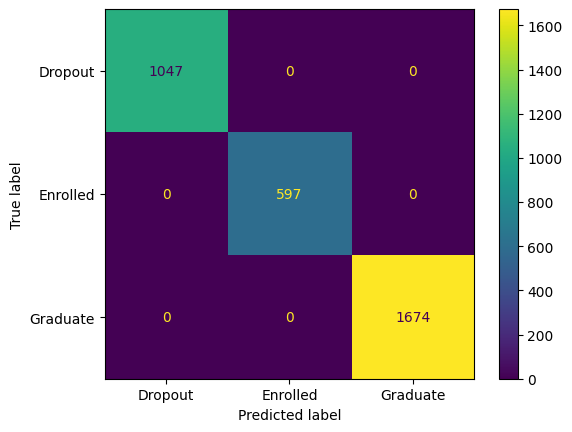

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Gridsearch Random Forest,1.0,1.0,1.0,1.0


In [ ]:
# Get predictions from the best estimator
y_pred = gs.best_estimator_.predict(X_train)

# Evaluate the predictions using the evaluation function
eval_classification(y_train, y_pred, name='Gridsearch Random Forest')


### Random Forest with PCA and Polynomial features

Random Forest with Polynomial Features 

              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       374
    Enrolled       0.55      0.34      0.42       197
    Graduate       0.78      0.92      0.84       535

    accuracy                           0.76      1106
   macro avg       0.71      0.67      0.68      1106
weighted avg       0.75      0.76      0.75      1106



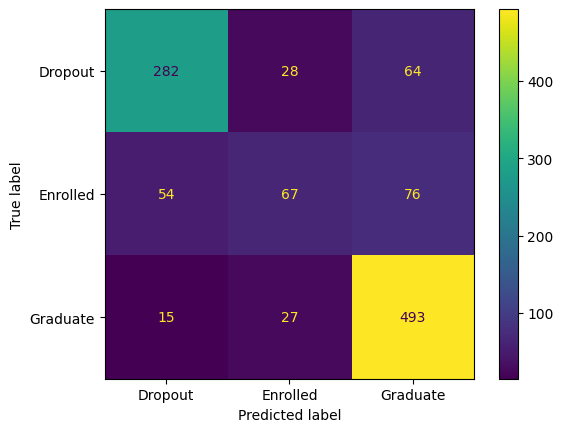

Random Forest with PCA 

              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       374
    Enrolled       0.57      0.30      0.39       197
    Graduate       0.76      0.93      0.84       535

    accuracy                           0.76      1106
   macro avg       0.72      0.67      0.68      1106
weighted avg       0.75      0.76      0.75      1106



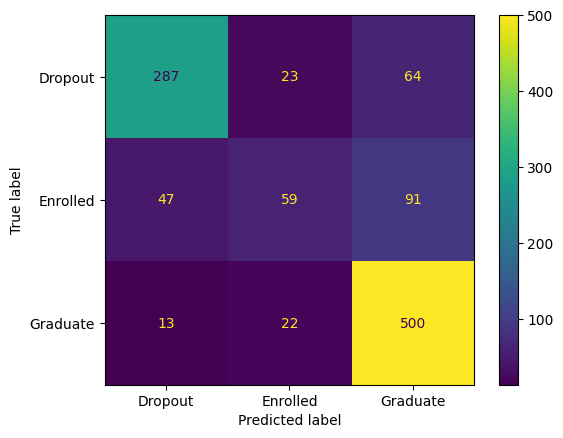

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Random Forest with PCA,0.749989,0.764919,0.74553,0.764919


In [ ]:
rf = RandomForestClassifier(random_state=42)
# Random Forest with PCA
rf_pca_pipe = make_pipeline(pca_preprocessor, RandomForestClassifier(random_state=42))

# Random Forest with Polynomial Features
rf_poly_pipe = make_pipeline(poly_preprocessor, RandomForestClassifier(random_state=42))

# Train and evaluate Random Forest with Polynomial Features
rf_poly_pipe.fit(X_train, y_train)
y_pred_poly = rf_poly_pipe.predict(X_test)
eval_classification(y_test, y_pred_poly, name='Random Forest with Polynomial Features')

# Train and evaluate Random Forest with PCA
rf_pca_pipe.fit(X_train, y_train)
y_pred_pca = rf_pca_pipe.predict(X_test)
eval_classification(y_test, y_pred_pca, name='Random Forest with PCA')


### Gradient Boosting

In [ ]:
scores = pd.DataFrame()

GB = GradientBoostingClassifier(random_state=42)
GB_pipe = make_pipeline(preprocessor, GB)
GB_pipe.fit(X_train, y_train)

y_pred = GB_pipe.predict(X_test)

train_pred = GB_pipe.predict(X_train)
test_pred = GB_pipe.predict(X_test)


Train 

              precision    recall  f1-score   support

     Dropout       0.89      0.84      0.86      1047
    Enrolled       0.76      0.58      0.66       597
    Graduate       0.85      0.95      0.90      1674

    accuracy                           0.85      3318
   macro avg       0.83      0.79      0.81      3318
weighted avg       0.85      0.85      0.84      3318



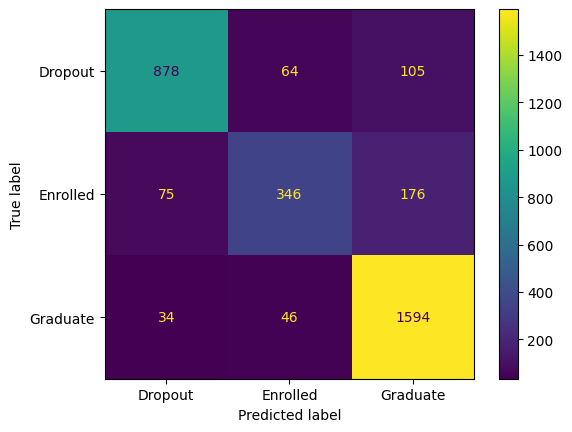

Test 

              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.78       374
    Enrolled       0.53      0.37      0.43       197
    Graduate       0.80      0.92      0.86       535

    accuracy                           0.77      1106
   macro avg       0.71      0.68      0.69      1106
weighted avg       0.75      0.77      0.76      1106



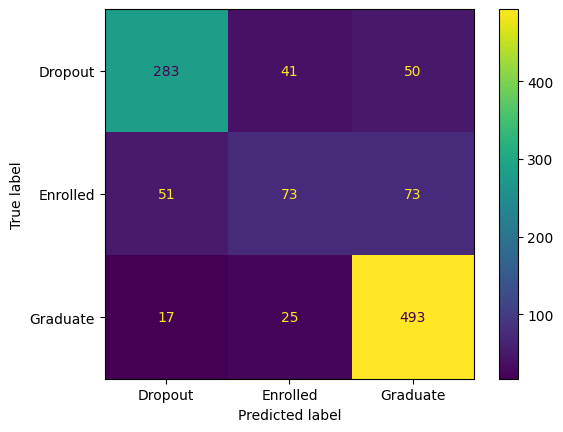

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Train,0.846137,0.849307,0.843868,0.849307
0,Test,0.753326,0.767631,0.755773,0.767631


In [ ]:
# evaluate model
train_scoresGB = eval_classification(y_train, train_pred, name='Train')

test_scoresGB = eval_classification(y_test, test_pred, name='Test')

GB_scores = pd.concat([train_scoresGB, test_scoresGB])
GB_scores

In [ ]:
# Making every other value from the range (odd values)
GB_list = list(range(1,55,2))
GB_list



[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53]

In [ ]:
GB_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x792984a4a350>),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                 

In [ ]:

params={'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'log_loss',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradientboostingclassifier__min_samples_leaf': 1,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingclassifier__min_weight_fraction_leaf': 0.0,
 'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__n_iter_no_change': None,
 'gradientboostingclassifier__random_state': 42,
 'gradientboostingclassifier__subsample': 1.0,
 'gradientboostingclassifier__tol': 0.0001,
 'gradientboostingclassifier__validation_fraction': 0.1,
 'gradientboostingclassifier__verbose': 0,
 'gradientboostingclassifier__warm_start': False}




In [ ]:
params = {'gradientboostingclassifier__ccp_alpha': [0.0]}

gs = GridSearchCV(GB_pipe, params, verbose=True, n_jobs=-1)
gs.fit(X_train, y_train)
best_params = gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
pd.set_option('display.max_columns',50)
# Getting the cv_results as a dataframe
cv_results = pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.640683,0.243403,0.026994,0.012059,0.0,{'gradientboostingclassifier__ccp_alpha': 0.0},0.769578,0.789157,0.784639,0.779789,0.782805,0.781194,0.006554,1


Gridsearch Gradient Boosting 

              precision    recall  f1-score   support

     Dropout       0.89      0.84      0.86      1047
    Enrolled       0.76      0.58      0.66       597
    Graduate       0.85      0.95      0.90      1674

    accuracy                           0.85      3318
   macro avg       0.83      0.79      0.81      3318
weighted avg       0.85      0.85      0.84      3318



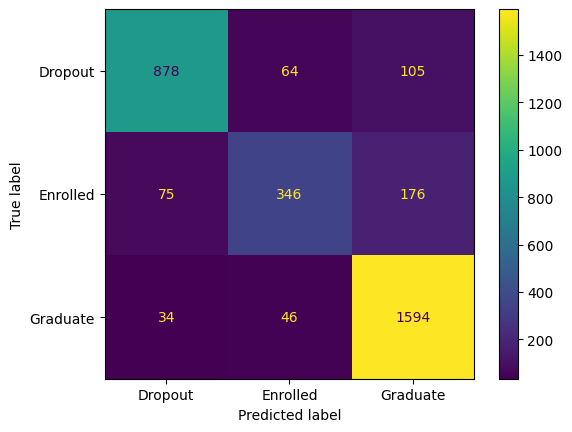

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Gridsearch Gradient Boosting,0.846137,0.849307,0.843868,0.849307


In [ ]:
# Get predictions from the best estimator
y_pred = gs.best_estimator_.predict(X_train)

# Evaluate the predictions using the evaluation function
eval_classification(y_train, y_pred, name='Gridsearch Gradient Boosting')


### Gradient Boosting with PCA and Polynomial features

Gradient Boosting with Polynomial Features 

              precision    recall  f1-score   support

     Dropout       0.80      0.76      0.78       374
    Enrolled       0.52      0.36      0.43       197
    Graduate       0.80      0.92      0.85       535

    accuracy                           0.76      1106
   macro avg       0.71      0.68      0.69      1106
weighted avg       0.75      0.76      0.75      1106



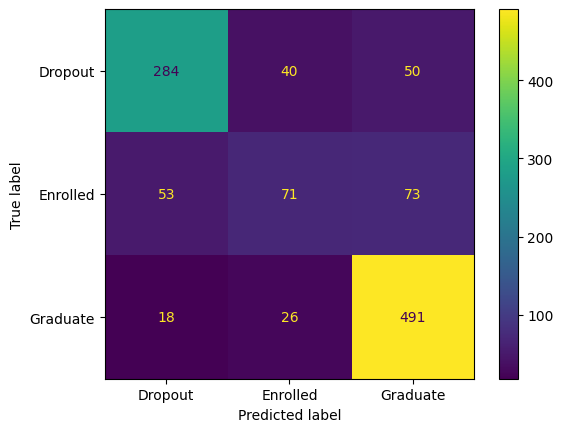

Gradient Boosting with PCA 

              precision    recall  f1-score   support

     Dropout       0.79      0.75      0.77       374
    Enrolled       0.51      0.36      0.42       197
    Graduate       0.80      0.92      0.86       535

    accuracy                           0.76      1106
   macro avg       0.70      0.68      0.68      1106
weighted avg       0.75      0.76      0.75      1106



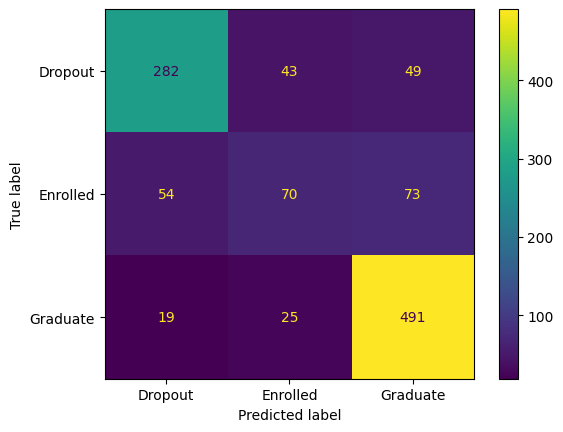

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Gradient Boosting with PCA,0.746423,0.762206,0.749835,0.762206


In [ ]:
GB = GradientBoostingClassifier(random_state=42)

# Gradient Boosting with PCA
GB_pca_pipe = make_pipeline(pca_preprocessor, GradientBoostingClassifier(random_state=42))

# Gradient Boosting with Polynomial Features
GB_poly_pipe = make_pipeline(poly_preprocessor, GradientBoostingClassifier(random_state=42))

# Train and evaluate Gradient Boosting with Polynomial Features
GB_poly_pipe.fit(X_train, y_train)
y_pred_poly = GB_poly_pipe.predict(X_test)
eval_classification(y_test, y_pred_poly, name='Gradient Boosting with Polynomial Features')

# Train and evaluate Gradient Boosting with PCA
GB_pca_pipe.fit(X_train, y_train)
y_pred_pca = GB_pca_pipe.predict(X_test)
eval_classification(y_test, y_pred_pca, name='Gradient Boosting with PCA')



# Model Evaluation:

**Decision Tree:**
- Achieves perfect training accuracy (1.00), indicating potential overfitting.
-Test accuracy is lower at 0.68.
-Decent precision, recall, and F1-scores for all classes.

**Logistic Regression:**
- Provides balanced training and test accuracy (0.78 and 0.76).
- Offers reasonable precision, recall, and F1-scores for all classes.
- A practical and interpretable choice.

**Random Forest:**
-Demonstrates perfect training accuracy (1.00) but lower test accuracy (0.76).
- Exhibits decent precision, recall, and F1-scores for all classes.
-Potential overfitting, but can be fine-tuned for better performance.

**Gradient Boosting:**
- Achieves good training accuracy (0.85) and test accuracy (0.77).
- Maintains reasonable precision, recall, and F1-scores for all classes.
- Offers a balance between predictive power and model complexity.

# Production Model:

 I'd choose Gradient Boosting as the production model for predicting student success. It offers a good balance between accuracy and interpretability, making it effective at identifying students at risk of dropping out or still enrolled. Its test accuracy of 0.77 and strong precision and recall metrics make it well-suited for intervention. Its ensemble approach also helps prevent overfitting compared to other models.